**IMPORTING LIBRARIES**

In [ ]:

import numpy as np
import pandas as pd
from matplotlib.ticker import MaxNLocator
pd.set_option("display.max_columns", None )
from sklearn import metrics
from sklearn import model_selection

import plotly.express as px
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from imblearn.over_sampling import ADASYN, SMOTE, BorderlineSMOTE, RandomOverSampler

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings(action='ignore')


In [ ]:
# class SimpleLogisiticRegression():
#     """
#     A simple Logisitc Regression Model which uses a fixed learning rate
#     and Gradient Ascent to update the model weights
#     """
#     def __init__(self):
#         self.w = []
#         pass

        
#     def initialize_weights(self, num_features):
#         #DO NOT MODIFY THIS FUNCTION
#         w = np.zeros((num_features))
#         return w

#     def compute_loss(self, X, y):
#         """
#         Compute binary cross-entropy loss for given model weights, features, and label.
#         :param w: model weights
#         :param X: features
#         :param y: label
#         :return: loss   
#         """
#         # INSERT YOUR CODE HERE

#         # Append 1's
#         X = np.c_[X, np.ones(X.shape[0])]

#         # Dot product of Features and model weights
#         dot_prod = np.dot(self.w,X.T)

#         # Compute sigmoid function of dot product
#         sig = self.sigmoid(dot_prod)

#         # Compute loss
#         loss = (-1.0 / X.shape[0]) * np.sum((y * np.log(sig)) + ((1 - y) * np.log(1 - sig)))
        
#         return loss

#         raise Exception('Function not yet implemented!')

    
#     def sigmoid(self, val):

#         """
#         Implement sigmoid function
#         :param val: Input value (float or np.array)
#         :return: sigmoid(Input value)
#         """
#         # INSERT YOUR CODE HERE
        
#         #replicated the formula of sigmoid
#         sig = 1 / (1 + np.exp(-val))

#         return sig

#         raise Exception('Function not yet implemented!')


#     def gradient_ascent(self, w, X, y, lr):

#         """
#         Perform one step of gradient ascent to update current model weights. 
#         :param w: model weights
#         :param X: features
#         :param y: label
#         :param lr: learning rate
#         Update the model weights
#         """
#         # INSERT YOUR CODE HERE

#         # Dot product of Features and given model weights
#         dot_prod = np.dot(X,w)

#         # Find y_pred using sigmoid of dot_prod
#         y_pred = self.sigmoid(dot_prod)

#         # Calculating gradient
#         grad = np.dot(X.T, y - y_pred)/X.shape[0]

#         # updating the weight accordingly the step size(learning rate - lr)
#         self.w += lr * grad


#     def fit(self,X, y, lr, iters, recompute=True):
#         """
#         Main training loop that takes initial model weights and updates them using gradient descent
#         :param w: model weights
#         :param X: features
#         :param y: label
#         :param lr: learning rate
#         :param recompute: Used to reinitialize weights to 0s. If false, it uses the existing weights Default True

#         NOTE: Since we are using a single weight vector for gradient ascent and not using 
#         a bias term we would need to append a column of 1's to the train set (X)

#         """
#         # INSERT YOUR CODE HERE

#         # As per the given NOTE appending a column of 1 in Training set
#         X = np.c_[X, np.ones(X.shape[0])]
        
#         if(recompute):
#             #Reinitialize the model weights
#             self.w = self.initialize_weights(X.shape[1])

#         for i in range(iters):
#             # INSERT YOUR CODE HERE
#             # Calculate the gradient
#             self.gradient_ascent(self.w,X,y,lr)
        

#     def predict_example(self, w, x):
#         """
#         Predicts the classification label for a single example x using the sigmoid function and model weights for a binary class example
#         :param w: model weights
#         :param x: example to predict
#         :return: predicted label for x
#         """
#         # INSERT YOUR CODE HERE

#         #Append the Example to predict with 1
#         x = np.append(x, 1)

#         # Calculate dot product of weights w and example features w
#         dot_prod = np.dot(x, w)
       
#         # Caluclate the sigmoid of dot_prod and store it in y_pred
#         y_pred = self.sigmoid(dot_prod)

#         # Return 1 if Y-pred >= 0.5 else 0
#         return 1 if y_pred >= 0.5 else 0

#         raise Exception('Function not yet implemented!')


#     def compute_error(self,y_true, y_pred):
#         """
#         Computes the average error between the true labels (y_true) and the predicted labels (y_pred)
#         :param y_true: true label
#         :param y_pred: predicted label
#         :return: error rate = (1/n) * sum(y_true!=y_pred)
#         """
#         # INSERT YOUR CODE HERE

#         # Calculate number of true labels and number of NOT true labels
#         num_true = len(y_true)
#         num_false = np.sum(y_true != y_pred)

#         # Calculate error rate
#         error = num_false / num_true

#         return error

#         raise Exception('Function not yet implemented!')

**IMPORTING DATA**

In [ ]:
data = pd.read_csv('/content/data.csv')


**DROPPING NULL VALUE RECORDS**

In [ ]:
data = data.dropna()
data

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.000000e+00,0.458143,7.250725e-04,0.000000,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,2.559237e-02,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.000000e+00,0.461867,6.470647e-04,0.000000,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9

**DESCRIPTIVE STATISTICS OF OUR NUMERICAL FEATURES**

In [ ]:
# Computing the descriptive statistics of our numrerical features
data.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,0.781381,1.995347e+09,1.950427e+09,0.467431,1.644801e+07,0.11

**CHECKING CLASS LABEL DISTRIBUTION**

0    6599
1     220
Name: Bankrupt?, dtype: int64
------------------------------
Financially stable:  96.77 % of the dataset
Financially unstable:  3.23 % of the dataset


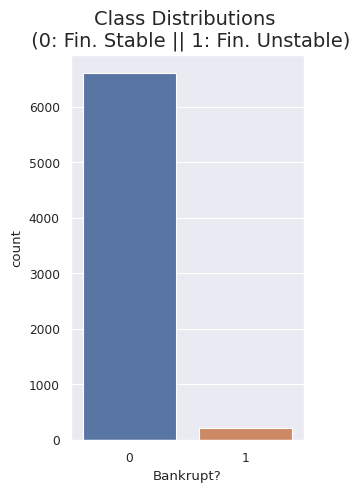

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#Exploratory Data Analysis
# The classes are heavily skewed we need to solve this issue later.
print(data['Bankrupt?'].value_counts())
print('-'* 30)
print('Financially stable: ', round(data['Bankrupt?'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Financially unstable: ', round(data['Bankrupt?'].value_counts()[1]/len(data) * 100,2), '% of the dataset')
# Checking labels distributions: not a balanced dataset

sns.set_theme(context = 'paper')

plt.figure(figsize = (3,5))
sns.countplot(x=data['Bankrupt?'])
plt.title('Class Distributions \n (0: Fin. Stable || 1: Fin. Unstable)', fontsize=14)
plt.show()

**LOOKING AT THE HISTOGRAMS OF NUMERICAL DATA**

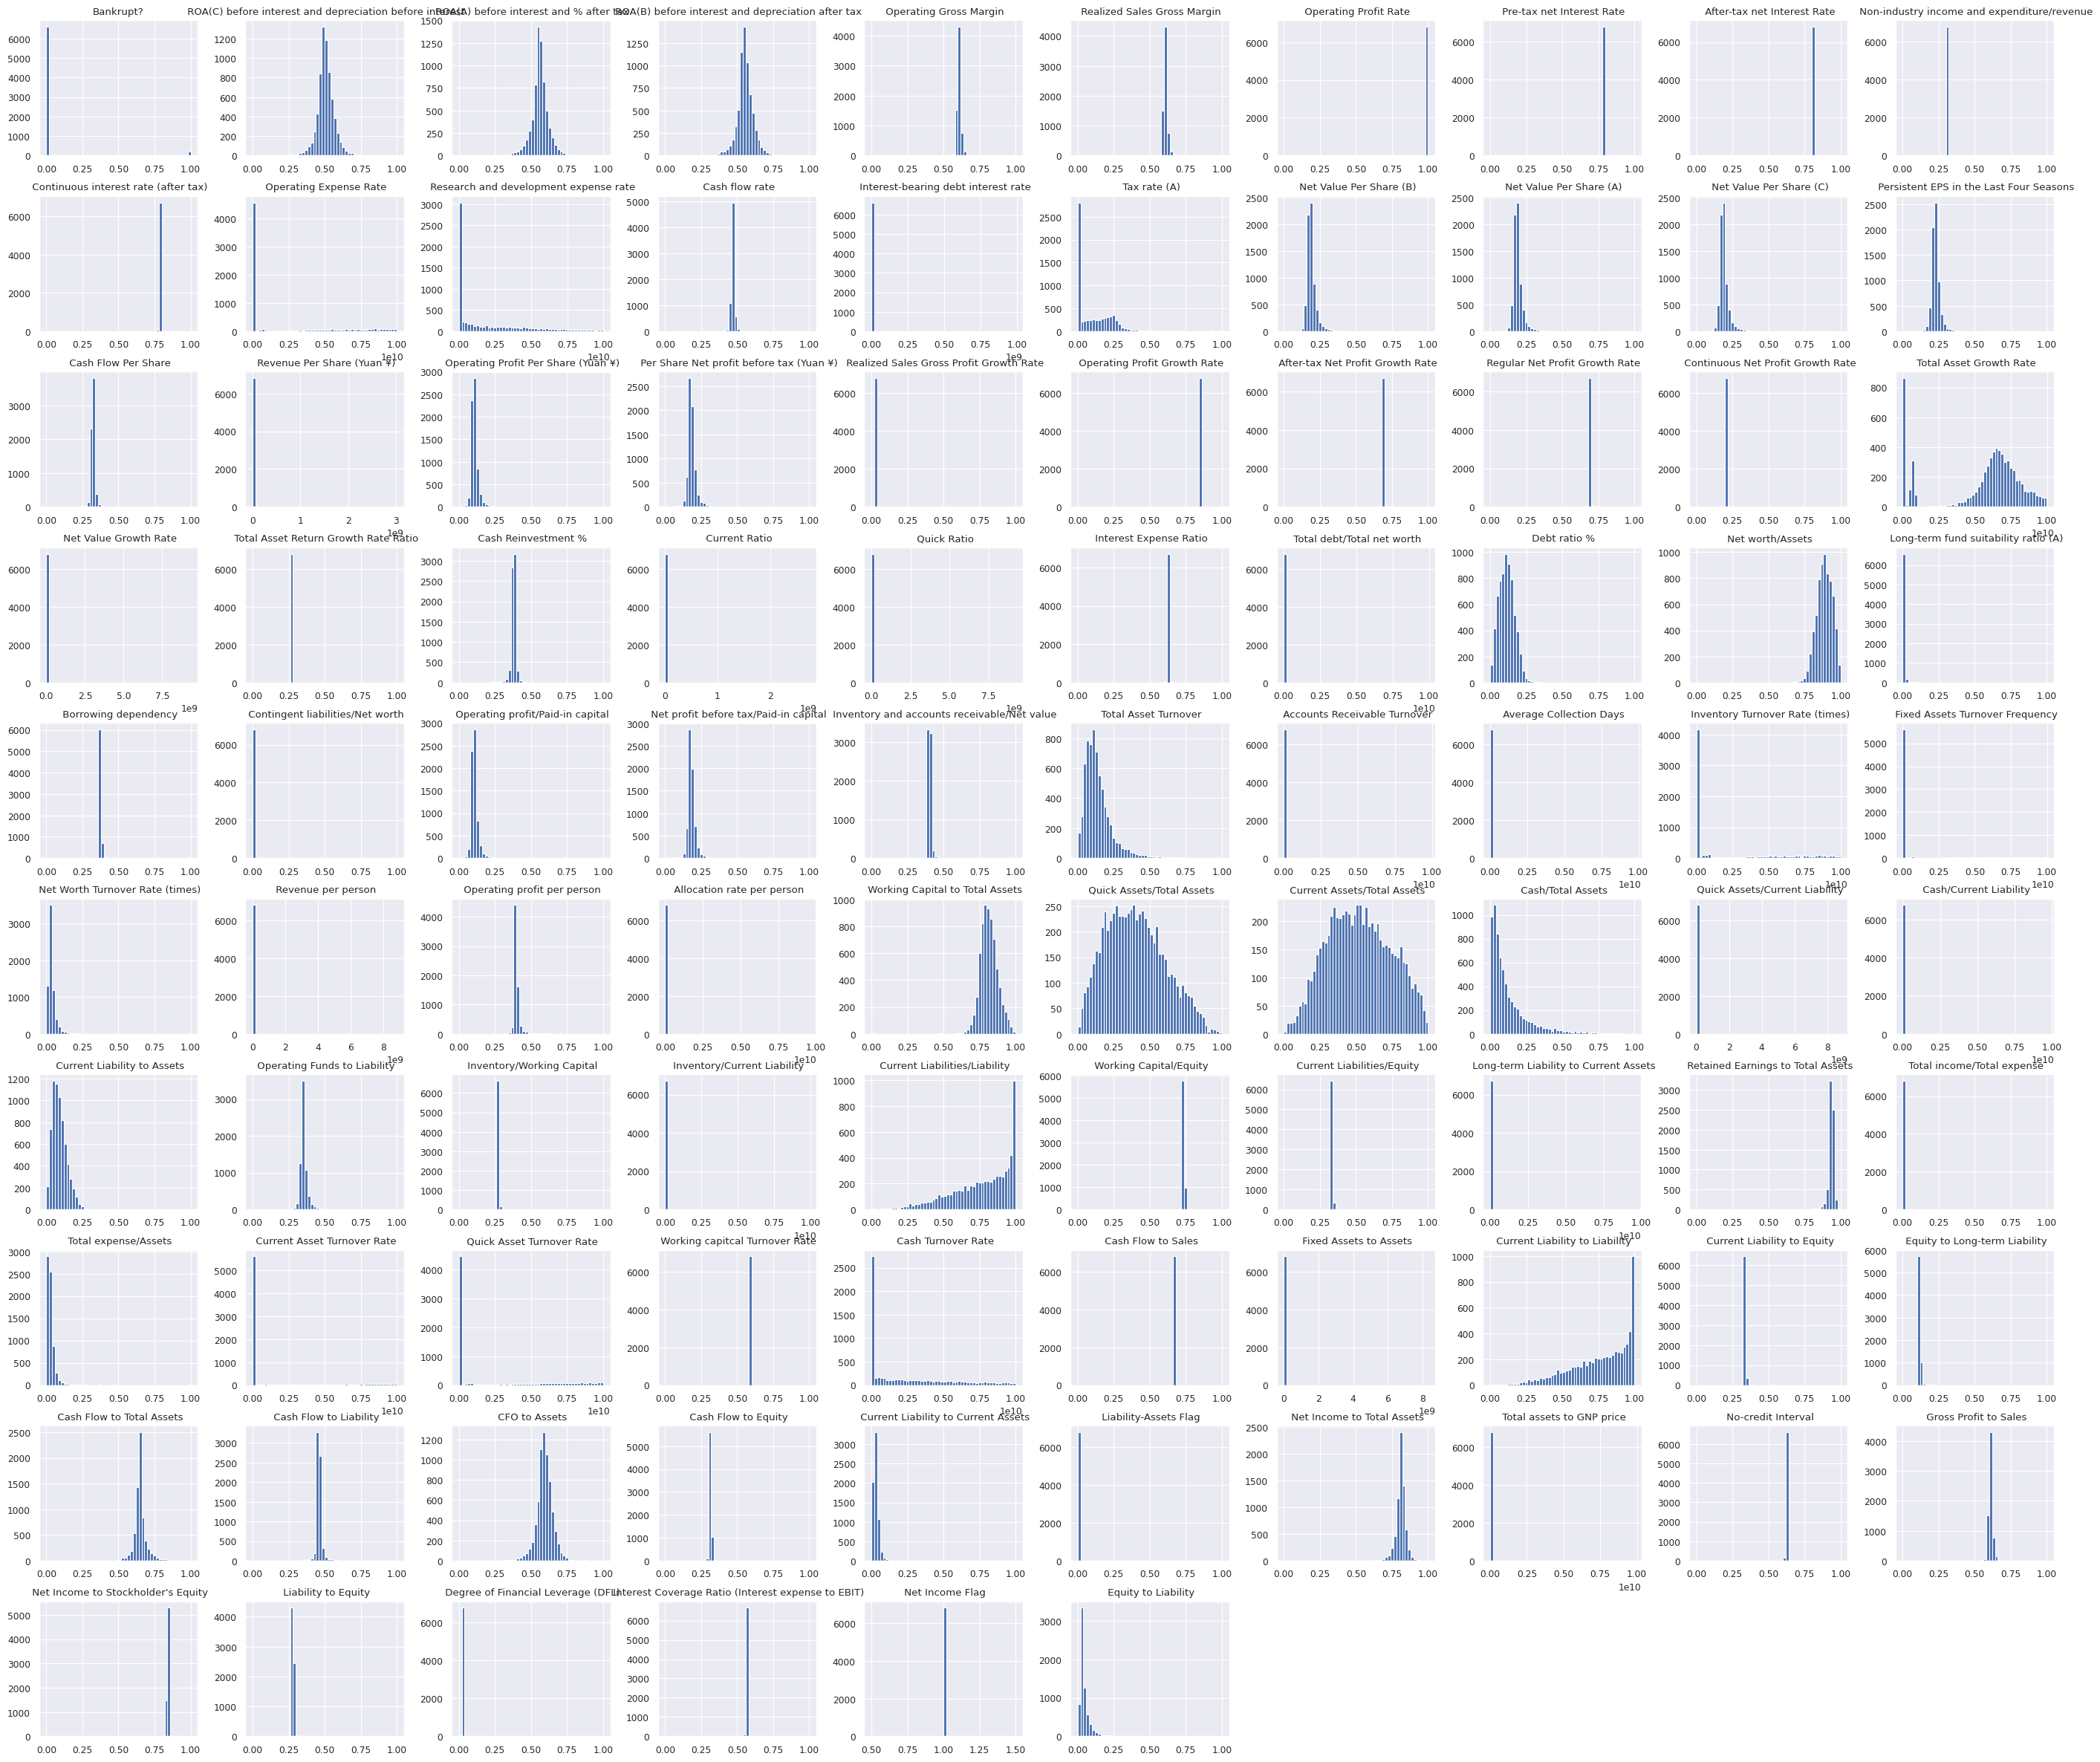

In [ ]:
# Looking at the histograms of numerical data
data.hist(figsize = (35,30), bins = 50)
plt.show()

**CORRELATION TABLE**

In [ ]:
data.corr()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
Bankrupt?,1.000000,-0.260807,-0.282941,-0.273051,-0.100043,-0.099445,-0.000230,-0.008517,-0.008857,-0.016593,-0.008395,-0.006083,-0.024232,-0.072356,-0.023063,-0.109706,-0.165399,-0.165465,-0.164784,-0.219560,-0.077516,-0.004692,-0.142051,-0.201395,-0.000458,-0.015168,-0.037783,-0.036820,-0.009401,-0.044431,0.065329,-0.016858,-0.051345,-0.002211,0.025058,-0.002681,0.012314,0.250161,-0.250161,0.016920,0.176543,0.070455,-0.141111,-0.207857,0.075278,-0.067915,-0.004754,-0.006556,-0.001376,0.072818,0.021089,0.039718,-0.092842,0.002829,-0.193083,-0.086382,-0.044823,-0.100130,-0.003823,0.077921,0.194494,-0.077082,-0.001906,0.000822,-0.020809,-0.147221,0.153828,0.000778,-0.217779,-0.007137,0.139049,0.011929,0.025814,-0.002894,-0.018035,0.000479,0.066328,-0.020809,0.153828,0.139014,-0.070456,-0.043125,-0.115383,-0.058563,0.171306,0.139212,-0.315457,0.035104,-0.005547,-0.100044,-0.180987,0.166812,0.010508,-0.005509,NaN,-0.083048
ROA(C) before interest and depreciation before interest,-0.260807,1.000000,0.940124,0.986849,0.334719,0.332755,0.035725,0.053419,0.049222,0.020501,0.051328,0.066869,0.106461,0.323482,0.048882,0.250761,0.505580,0.505407,0.505281,0.775006,0.379839,-0.015932,0.687201,0.750564,0.000591,0.036511,0.115083,0.115040,0.025234,0.019635,-0.021930,0.079906,0.296158,0.013196,-0.026336,0.003988,-0.022208,-0.26

**SPEARMAN CORRELATION HEATMAP**

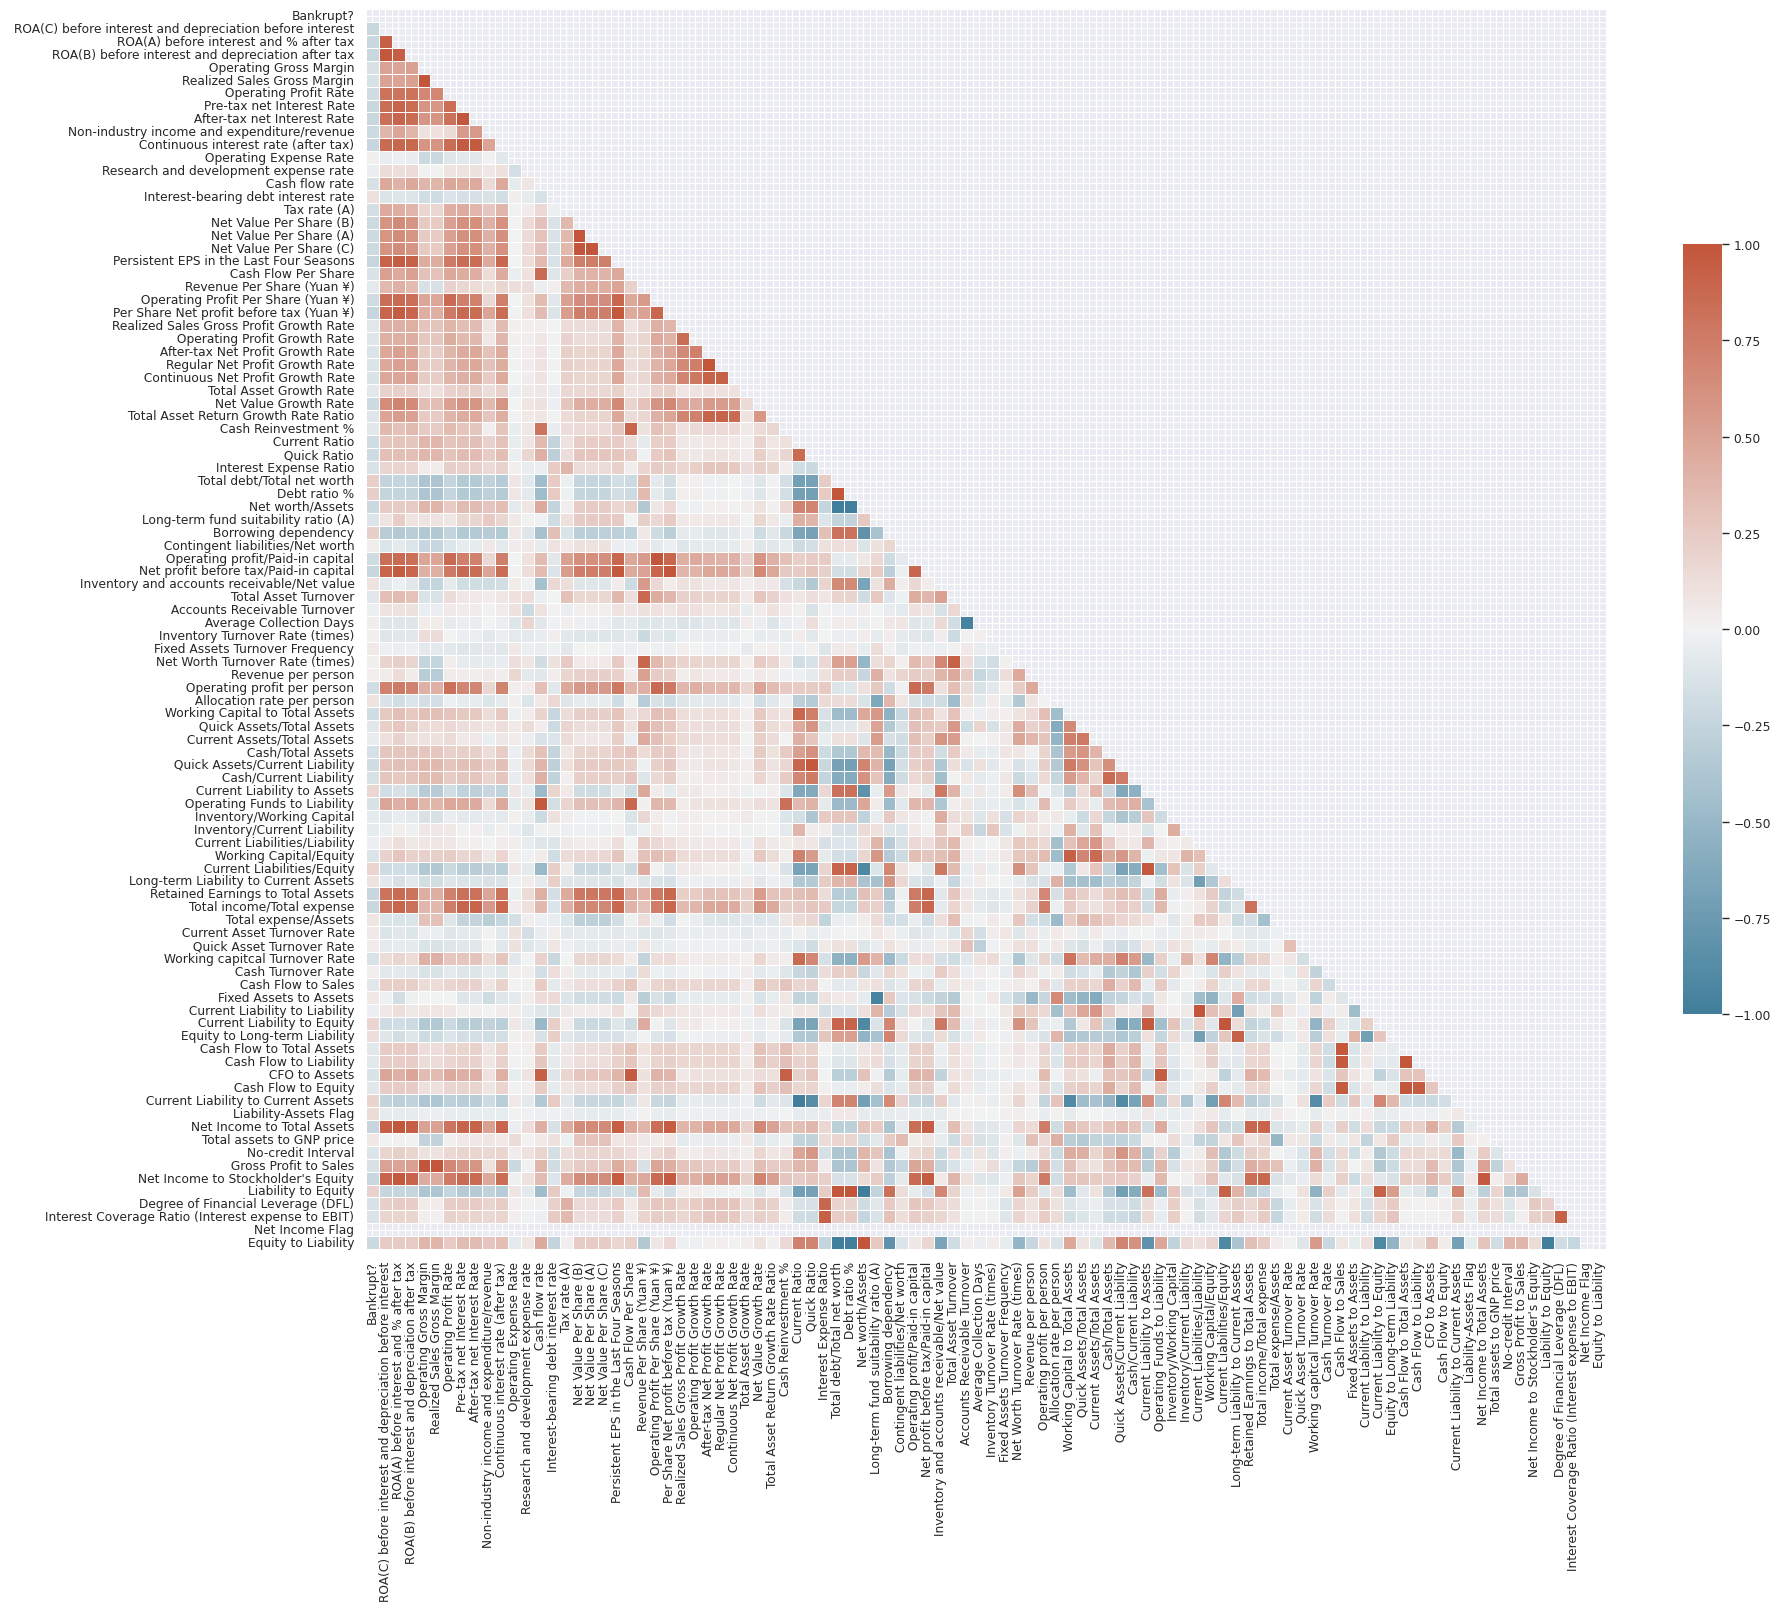

In [ ]:
#Basic Seaborn Heatmap
f, ax = plt.subplots(figsize=(20, 20))
mat = data.corr('spearman')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=0,# annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

**PLOTTING BOXPLOTS TO INDENTIFY OUTLIERS**

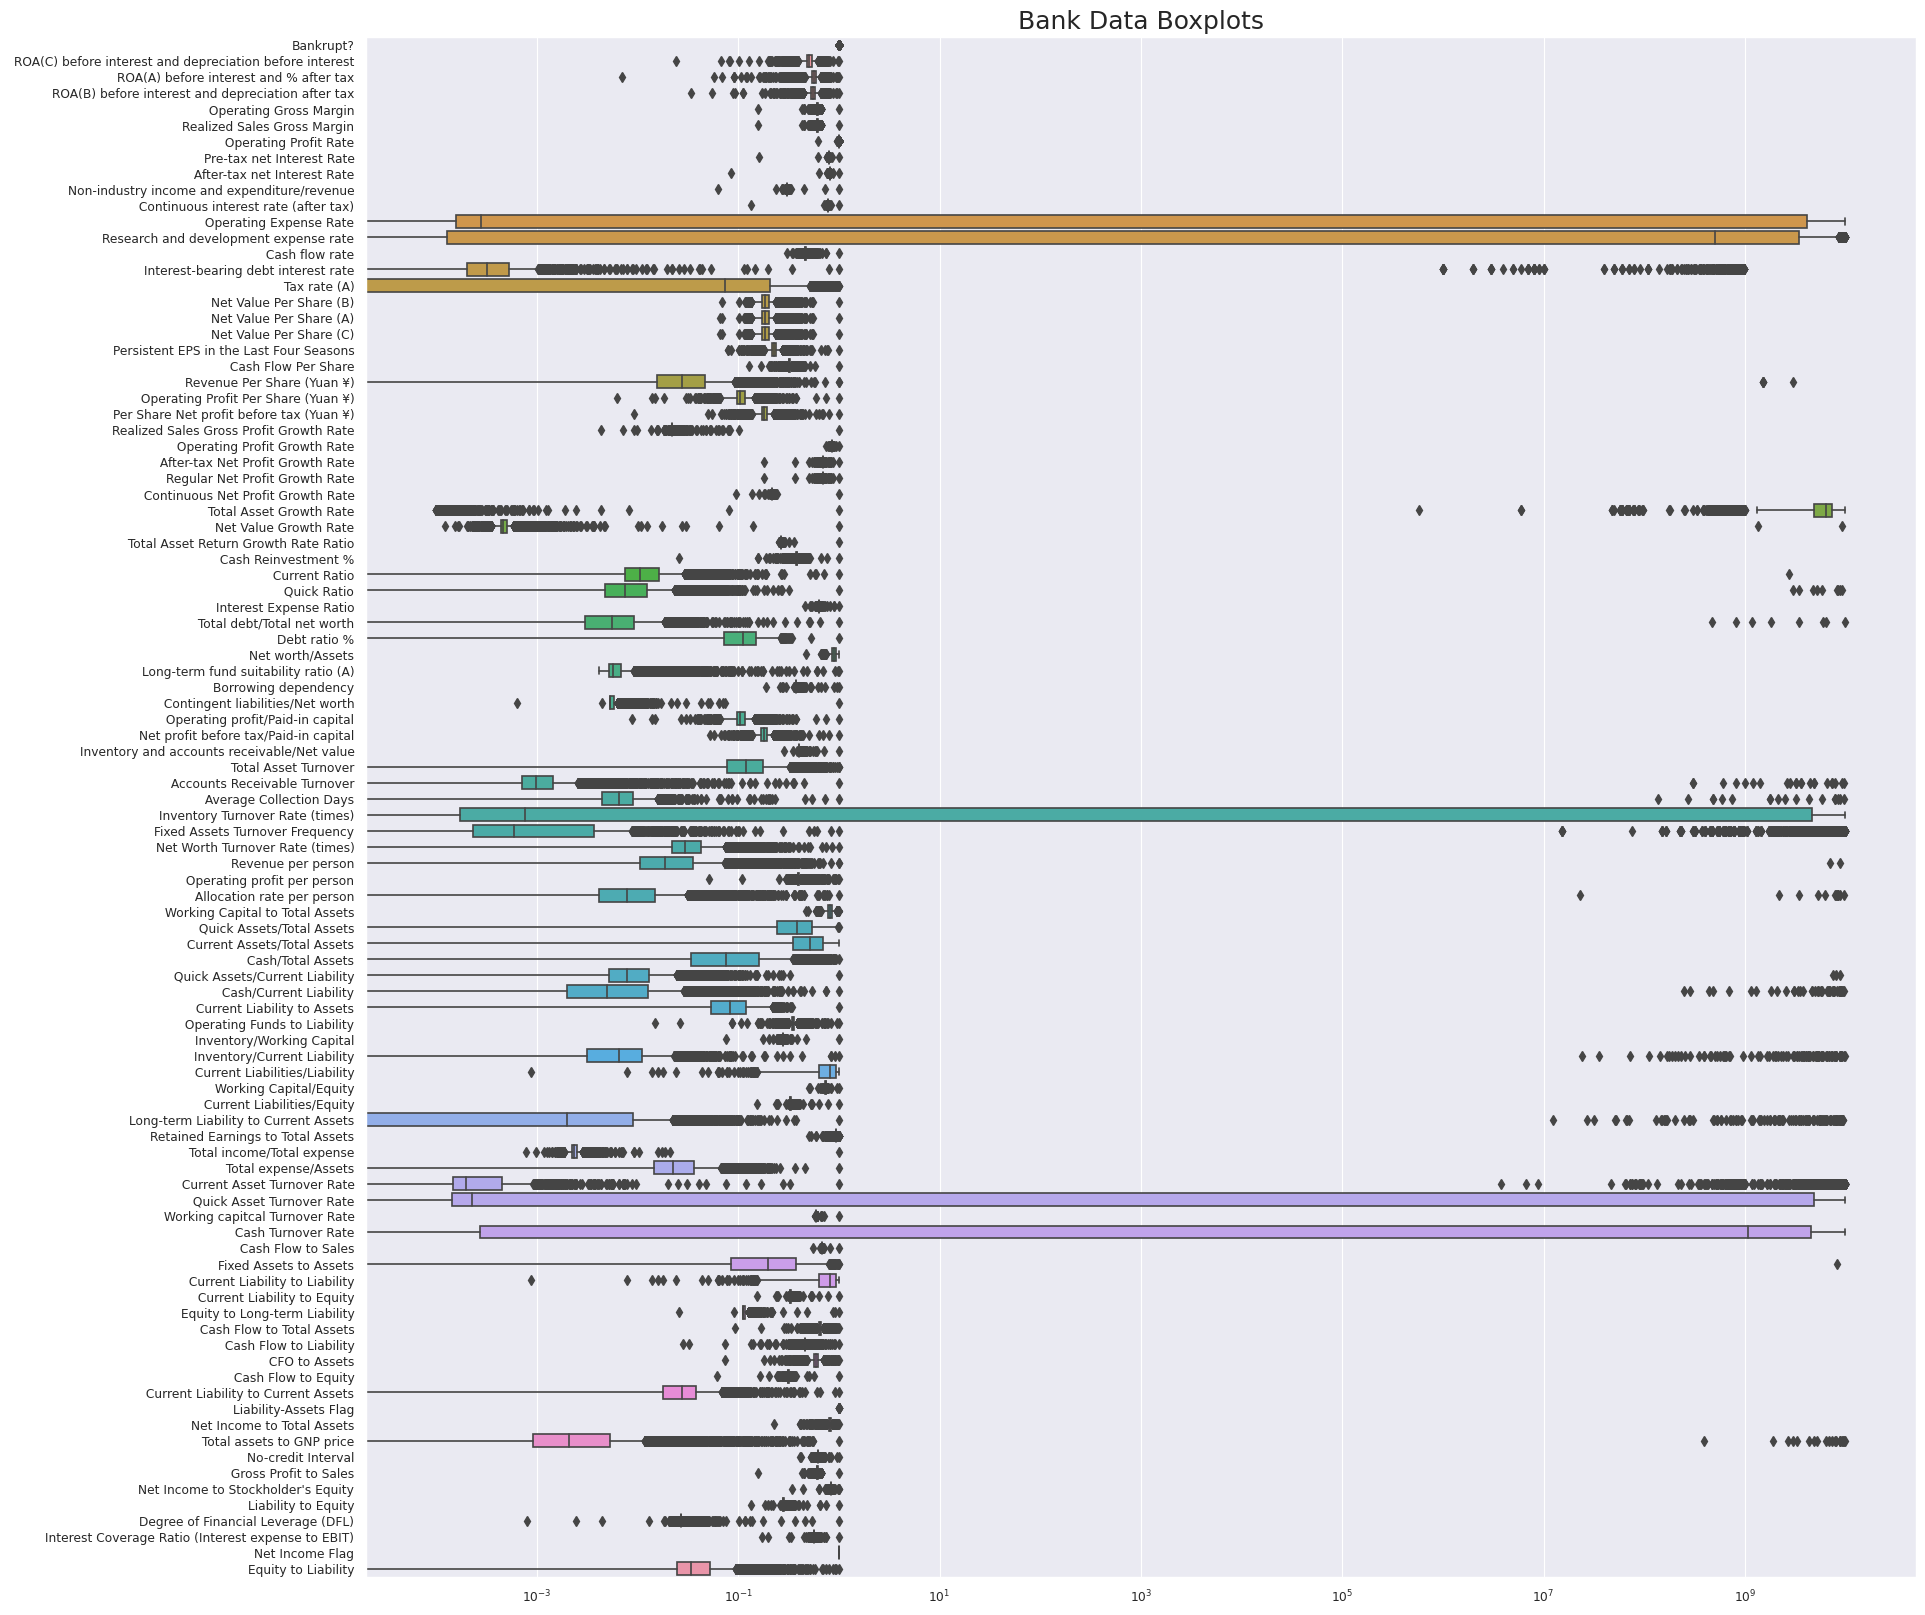

In [ ]:
# Plotting Boxplots of the numerical features
plt.figure(figsize = (20,20))
ax =sns.boxplot(data = data, orient="h")
ax.set_title('Bank Data Boxplots', fontsize = 18)
ax.set(xscale="log")
plt.show()

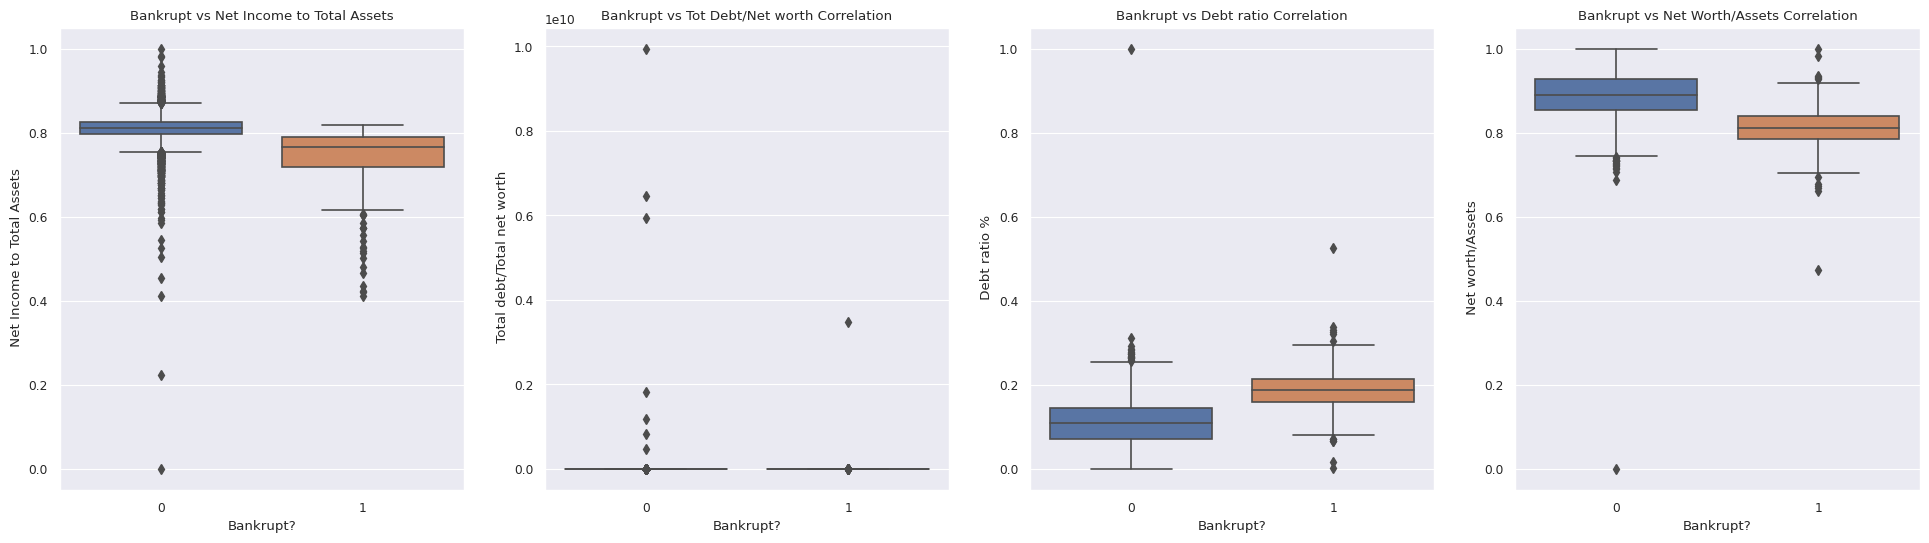

In [ ]:
# Plotting interesting features

f, axes = plt.subplots(ncols=4, figsize=(24,6))

sns.boxplot(x='Bankrupt?', y=" Net Income to Total Assets", data=data, ax=axes[0])
axes[0].set_title('Bankrupt vs Net Income to Total Assets')

sns.boxplot(x='Bankrupt?', y=" Total debt/Total net worth", data=data, ax=axes[1]) 
axes[1].set_title('Bankrupt vs Tot Debt/Net worth Correlation')


sns.boxplot(x='Bankrupt?', y=" Debt ratio %", data=data, ax=axes[2])
axes[2].set_title('Bankrupt vs Debt ratio Correlation')


sns.boxplot(x='Bankrupt?', y=" Net worth/Assets", data=data, ax=axes[3])  
axes[3].set_title('Bankrupt vs Net Worth/Assets Correlation') 

plt.show()

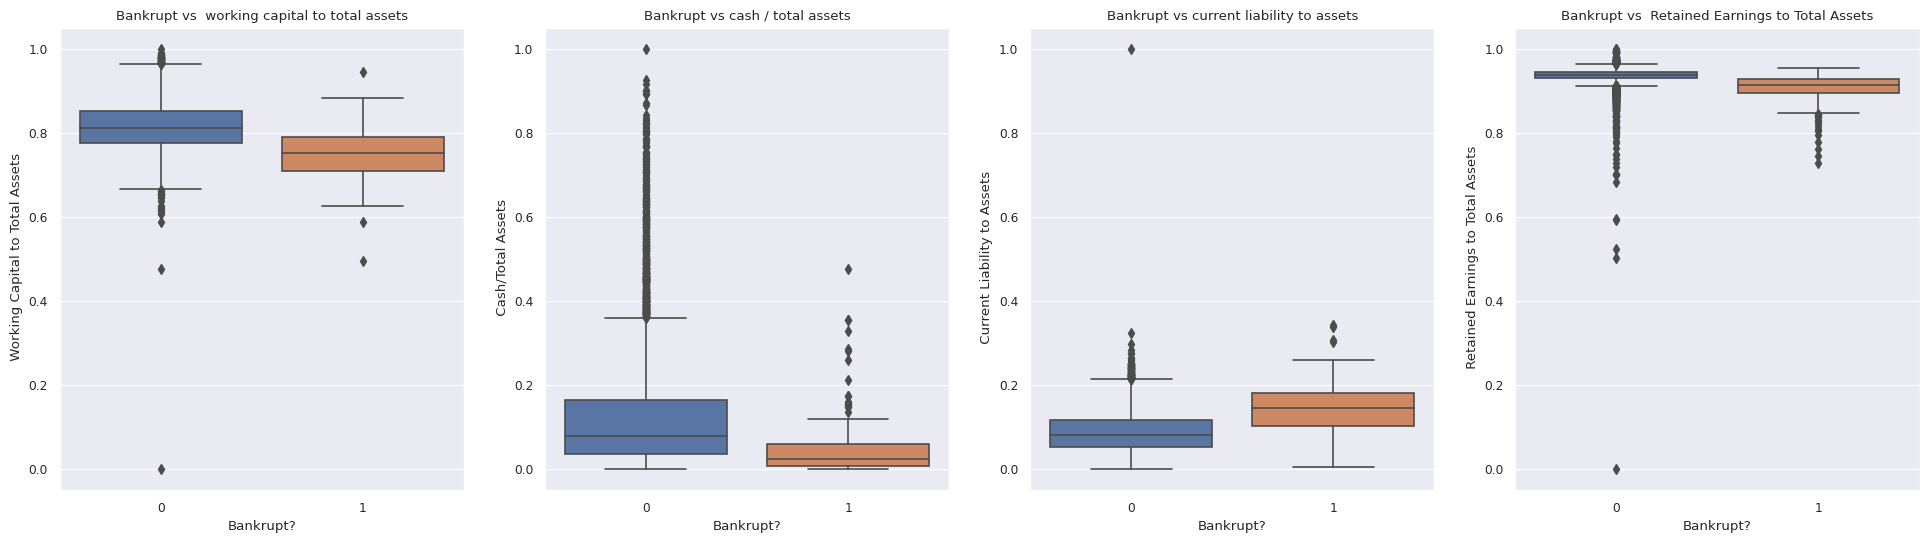

In [ ]:
# Plotting other interesting features

f, axes = plt.subplots(ncols=4, figsize=(24,6))

sns.boxplot(x='Bankrupt?', y=" Working Capital to Total Assets", data=data, ax=axes[0])
axes[0].set_title('Bankrupt vs  working capital to total assets')

sns.boxplot(x='Bankrupt?', y=" Cash/Total Assets", data=data, ax=axes[1])
axes[1].set_title('Bankrupt vs cash / total assets')


sns.boxplot(x='Bankrupt?', y=" Current Liability to Assets", data=data, ax=axes[2])
axes[2].set_title('Bankrupt vs current liability to assets')


sns.boxplot(x='Bankrupt?', y=" Retained Earnings to Total Assets", data=data, ax=axes[3])
axes[3].set_title('Bankrupt vs  Retained Earnings to Total Assets')

plt.show()

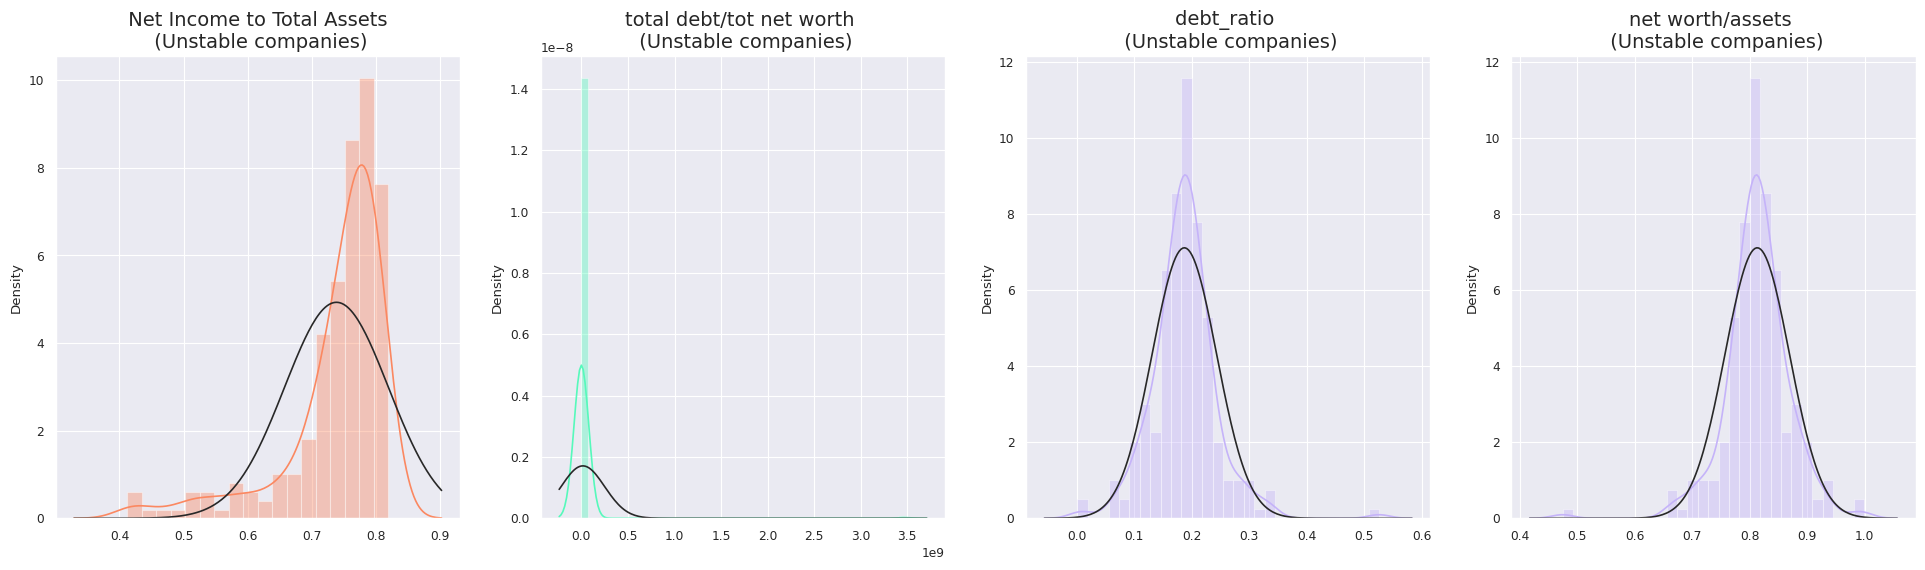

In [ ]:
from scipy import stats
norm = stats.norm

f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(24, 6))

cash_flow_rate = data[' Net Income to Total Assets'].loc[data['Bankrupt?'] == 1].values
sns.distplot(cash_flow_rate,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title(' Net Income to Total Assets \n (Unstable companies)', fontsize=14)

tot_debt_net = data[' Total debt/Total net worth'].loc[data['Bankrupt?'] == 1].values
sns.distplot(tot_debt_net ,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('total debt/tot net worth \n (Unstable companies)', fontsize=14)


debt_ratio = data[' Debt ratio %'].loc[data['Bankrupt?'] == 1].values
sns.distplot(debt_ratio,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('debt_ratio \n (Unstable companies)', fontsize=14)

net_worth_assets = data[' Net worth/Assets'].loc[data['Bankrupt?'] == 1].values
sns.distplot(net_worth_assets,ax=ax4, fit=norm, color='#C5B3F9')
ax4.set_title('net worth/assets \n (Unstable companies)', fontsize=14)

plt.show()

In [ ]:
# Outliers removal

def outliers_removal(feature,feature_name,dataset):
    
    # Identify 25th & 75th quartiles

    q25, q75 = np.percentile(feature, 25), np.percentile(feature, 75)
    print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
    feat_iqr = q75 - q25
    print('iqr: {}'.format(feat_iqr))
    
    feat_cut_off = feat_iqr * 1.5
    feat_lower, feat_upper = q25 - feat_cut_off, q75 + feat_cut_off
    print('Cut Off: {}'.format(feat_cut_off))
    print(feature_name +' Lower: {}'.format(feat_lower))
    print(feature_name +' Upper: {}'.format(feat_upper))
    
    outliers = [x for x in feature if x < feat_lower or x > feat_upper]
    print(feature_name + ' outliers for close to bankruptcy cases: {}'.format(len(outliers)))
    #print(feature_name + ' outliers:{}'.format(outliers))

    dataset = dataset.drop(dataset[(dataset[feature_name] > feat_upper) | (dataset[feature_name] < feat_lower)].index)
    print('-' * 65)
    
    return dataset

for col in data:
    new_df = outliers_removal(data[col],str(col),data)

Quartile 25: 0.0 | Quartile 75: 0.0
iqr: 0.0
Cut Off: 0.0
Bankrupt? Lower: 0.0
Bankrupt? Upper: 0.0
Bankrupt? outliers for close to bankruptcy cases: 220
-----------------------------------------------------------------
Quartile 25: 0.476527080388047 | Quartile 75: 0.535562813825379
iqr: 0.05903573343733198
Cut Off: 0.08855360015599797
 ROA(C) before interest and depreciation before interest Lower: 0.38797348023204903
 ROA(C) before interest and depreciation before interest Upper: 0.624116413981377
 ROA(C) before interest and depreciation before interest outliers for close to bankruptcy cases: 391
-----------------------------------------------------------------
Quartile 25: 0.53554295682512 | Quartile 75: 0.58915721761884
iqr: 0.05361426079372
Cut Off: 0.08042139119058
 ROA(A) before interest and % after tax Lower: 0.45512156563454
 ROA(A) before interest and % after tax Upper: 0.66957860880942
 ROA(A) before interest and % after tax outliers for close to bankruptcy cases: 561
-------

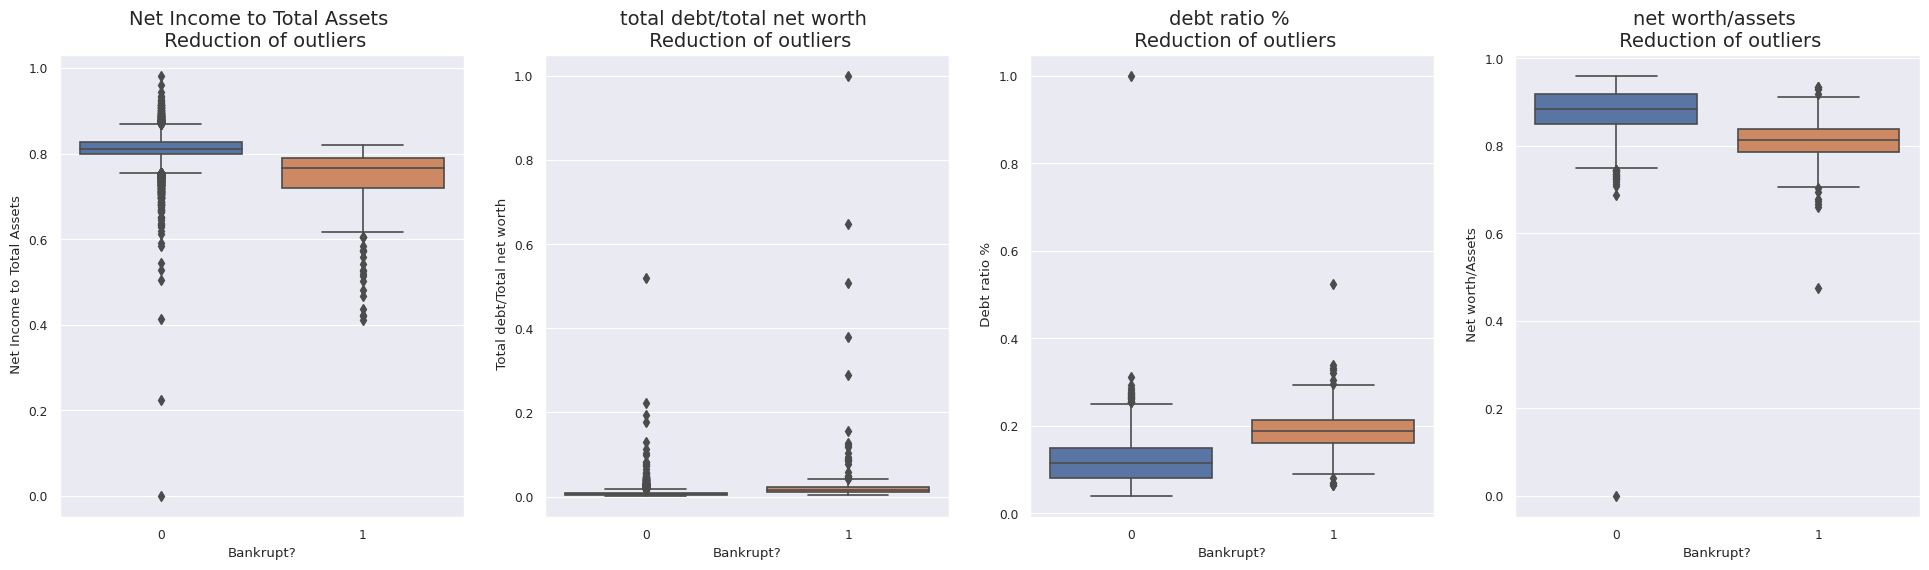

In [ ]:
f,(ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24,6))

# Boxplots with outliers removed

sns.boxplot(x="Bankrupt?", y=" Net Income to Total Assets", data=new_df,ax=ax1) 
ax1.set_title("Net Income to Total Assets \n Reduction of outliers", fontsize=14)

sns.boxplot(x="Bankrupt?", y=" Total debt/Total net worth", data=new_df,ax=ax2) 
ax2.set_title("total debt/total net worth \n Reduction of outliers", fontsize=14)

sns.boxplot(x="Bankrupt?", y=" Debt ratio %", data=new_df,ax=ax3) 
ax3.set_title("debt ratio % \n Reduction of outliers", fontsize=14)

sns.boxplot(x="Bankrupt?", y=' Net worth/Assets', data=new_df,ax=ax4) 
ax4.set_title("net worth/assets \n Reduction of outliers", fontsize=14)
        
plt.show()


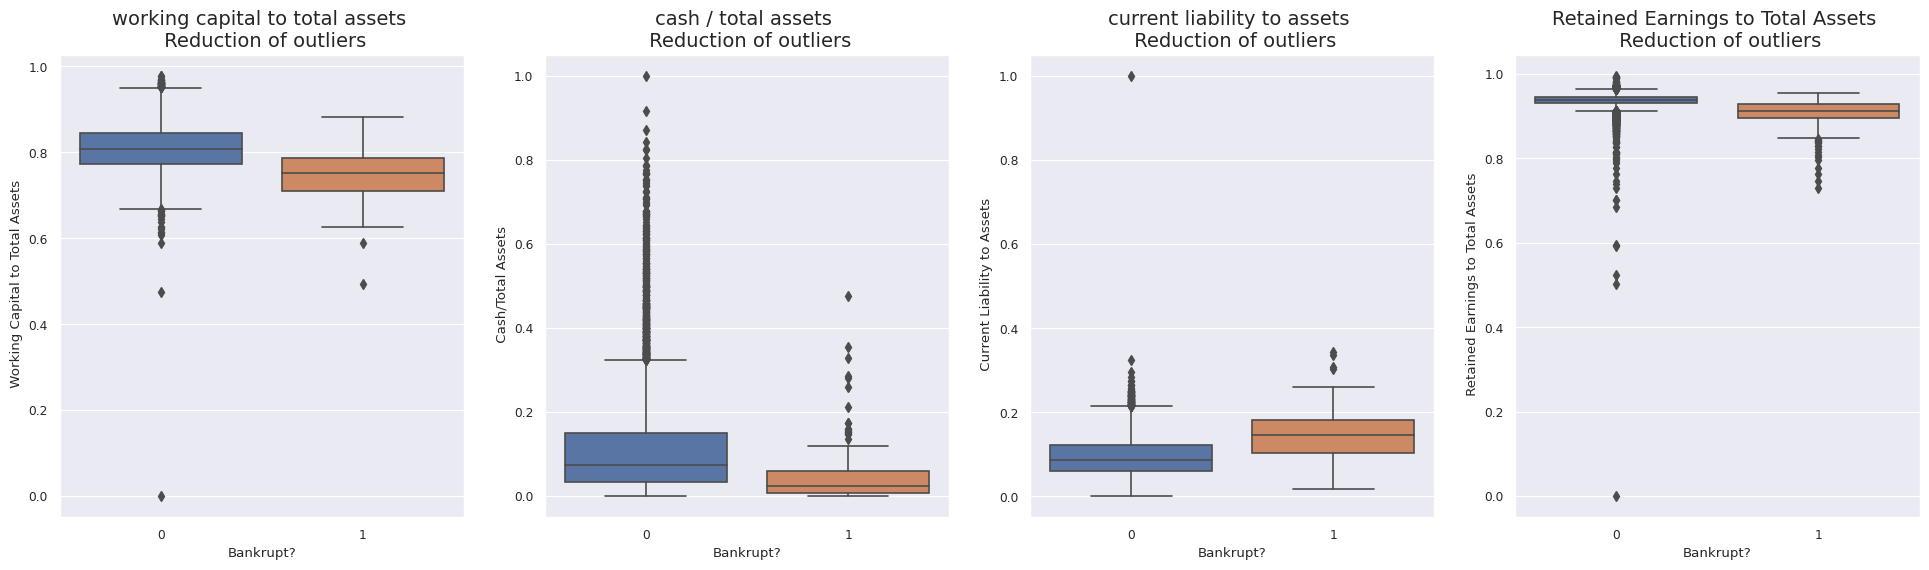

In [ ]:
f,(ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24,6))

# Boxplots with outliers removed

sns.boxplot(x="Bankrupt?", y=' Working Capital to Total Assets', data=new_df,ax=ax1) 
ax1.set_title("working capital to total assets \n Reduction of outliers", fontsize=14)

sns.boxplot(x="Bankrupt?", y=' Cash/Total Assets', data=new_df,ax=ax2) 
ax2.set_title("cash / total assets \n Reduction of outliers", fontsize=14)

sns.boxplot(x="Bankrupt?", y=' Current Liability to Assets', data=new_df,ax=ax3) 
ax3.set_title("current liability to assets \n Reduction of outliers", fontsize=14)

sns.boxplot(x="Bankrupt?", y=' Retained Earnings to Total Assets', data=new_df,ax=ax4) 
ax4.set_title("Retained Earnings to Total Assets \n Reduction of outliers", fontsize=14)
        
plt.show()

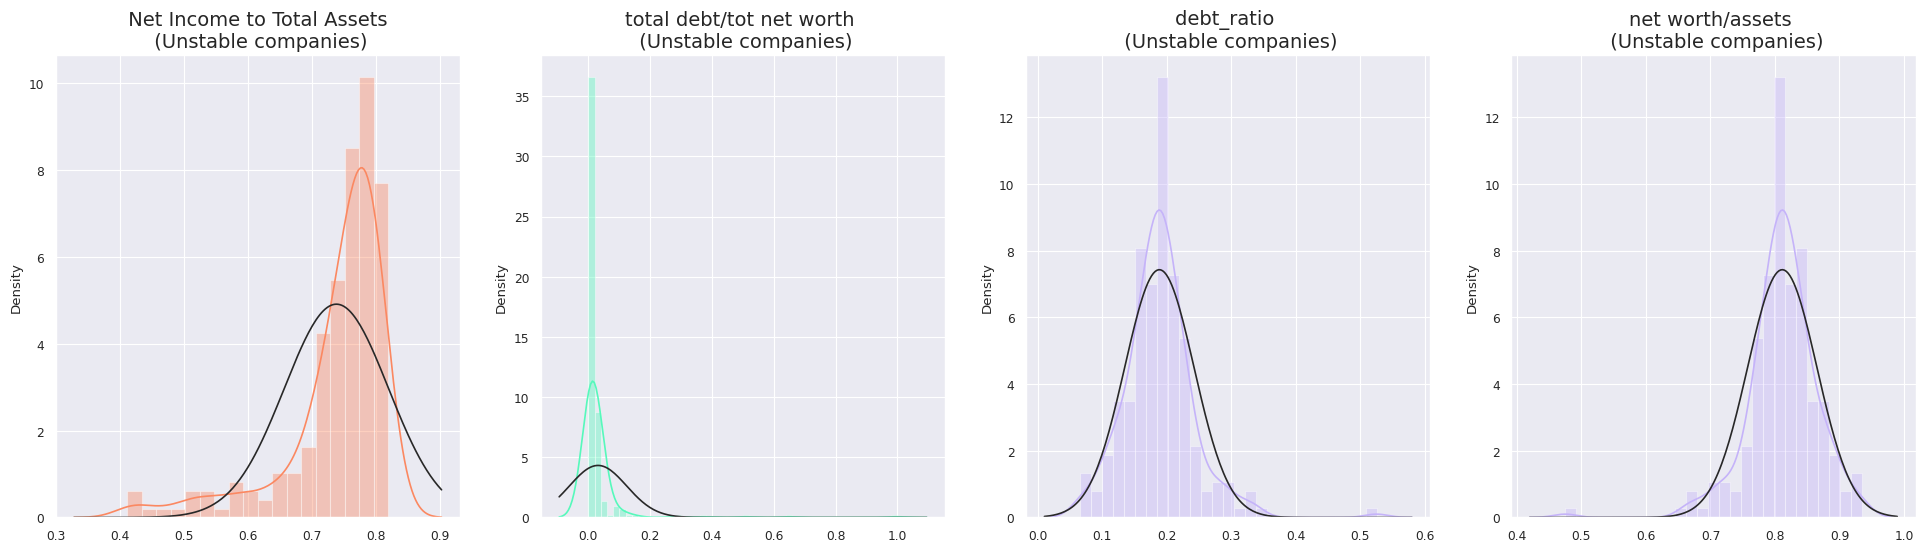

In [ ]:
# Plotting the feature distributions for close to bankrputcy companies

f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(24, 6))

cash_flow_rate = new_df[' Net Income to Total Assets'].loc[new_df['Bankrupt?'] == 1].values
sns.distplot(cash_flow_rate,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title(' Net Income to Total Assets \n (Unstable companies)', fontsize=14)

tot_debt_net = new_df[' Total debt/Total net worth'].loc[new_df['Bankrupt?'] == 1].values
sns.distplot(tot_debt_net ,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('total debt/tot net worth \n (Unstable companies)', fontsize=14)


debt_ratio = new_df[' Debt ratio %'].loc[new_df['Bankrupt?'] == 1].values
sns.distplot(debt_ratio,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('debt_ratio \n (Unstable companies)', fontsize=14)

net_worth_assets = new_df[' Net worth/Assets'].loc[new_df['Bankrupt?'] == 1].values
sns.distplot(net_worth_assets,ax=ax4, fit=norm, color='#C5B3F9')
ax4.set_title('net worth/assets \n (Unstable companies)', fontsize=14)

plt.show()

In [ ]:
def preprocess_inputs(df):
  df = df.copy()
  y = df['Bankrupt?']
  X = df.drop('Bankrupt?', axis=1)
  
  # Train-test split
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)
  
  # Scale X
  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
  X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
  
  return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = preprocess_inputs(data)

In [ ]:
X_train

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
3392,-7.065972,-7.189713,-7.577832,-0.353178,-0.352216,-27.422519,-9.852867,-9.473508,0.174600,-17.488805,-0.623336,-0.750627,-3.409234,-0.146024,-0.831378,-1.684936,-1.679626,-1.680602,-2.210939,-1.269358,-0.023643,-2.383154,-1.803000,-0.072283,-0.149416,-0.092698,-0.093621,-0.017514,-1.071132,-0.123720,-0.358472,-6.762465,-0.014476,-0.029836,-0.031652,-0.025154,-0.245936,0.245936,-0.118704,-0.292121,-0.045435,-2.398334,-1.930971,-0.554824,-1.366000,-0.04243,-0.038594,0.886224,0.736406,-0.842540,-0.020349,-0.918259,-0.039086,0.776376,1.652612,0.989620,-0.369080,-0.014476,-0.074892,0.334264,-4.717374,-0.033918,-0.090308,1.161424,0.227750,-0.066147,-0.092181,-6.779749,-0.045371,8.415101,-0.423261,-0.643034,0.806322,-0.842942,-1.475297,-0.161486,1.161424,-0.066147,-0.219187,-5.838952,-2.424303,-8.876742,-3.764293,-0.301941,-0.032383,-9.998552,4.692638,-0.014135,-0.353225,-1.832779,-0.140534,-0.046856,-0.002980,0.0,-0.193823
2755,0.405365,0.354931,0.313557,0.203699,0.200630,0.105921,0.077435,0.062927,0.047214,0.099756,-0.623336,1.316196,0.168498,-0.146024,0.987475,-0.101405,-0.100452,-0.101962,0.111816,0.190816,-0.023643,-0.097101,0.136276,-0.080535,-0.032348,0.008982,0.007273,-0.008501,0.377593,-0.034893,-0.058556,0.354458,-0.014476,-0.029836,-0.006998,-0.025154,-0.432271,0.432271,-0.119722,-0.156458,-0.017916,-0.092838,0.1

In [ ]:
y_train

3392    0
2755    0
4442    0
4267    0
4912    0
       ..
905     0
5192    0
3980    0
235     1
5157    0
Name: Bankrupt?, Length: 4773, dtype: int64

**OVERSAMPLING OF DATA USING ADASYN TECHNIQUE**

<Axes: xlabel='Bankrupt?', ylabel='count'>

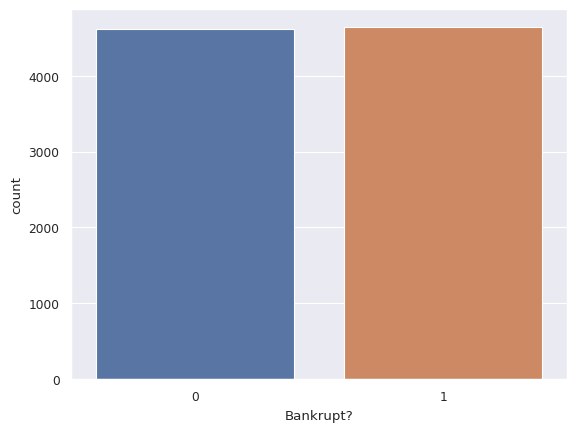

In [ ]:
#Oversampling the dataset since it was highly skewed towards Financialy Stable Companies
oversample = ADASYN(random_state=42, sampling_strategy="minority")
X_train, y_train = oversample.fit_resample(X_train, y_train)
sns.countplot(data=X_train, x=y_train)

In [ ]:
original_models = {
    "                   Logistic Regression": LogisticRegression(),
    "                   K-Nearest Neighbors": KNeighborsClassifier(),
    "                         Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (Linear Kernel)": SVC(kernel='linear',probability=True),
    "   Support Vector Machine (RBF Kernel)": SVC(kernel='rbf',probability=True),
    "                        Neural Network": MLPClassifier(),
    "                         Random Forest": RandomForestClassifier(),
    "                     Gradient Boosting": GradientBoostingClassifier(),
    "                          XG Boosting ": XGBClassifier(use_label_encoder=False,booster='gbtree',eta=0.3)
}


for name, model in original_models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

                   Logistic Regression trained.
                   K-Nearest Neighbors trained.
                         Decision Tree trained.
Support Vector Machine (Linear Kernel) trained.
   Support Vector Machine (RBF Kernel) trained.
                        Neural Network trained.
                         Random Forest trained.
                     Gradient Boosting trained.
                          XG Boosting  trained.


In [ ]:
original_results = []

for name, model in original_models.items():
    y_pred = model.predict(X_test)
    result = model.score(X_test, y_test)
    original_results.append(result)
    print(name + ": {:.2f}%".format(result * 100))

                   Logistic Regression: 87.59%
                   K-Nearest Neighbors: 88.12%
                         Decision Tree: 92.91%
Support Vector Machine (Linear Kernel): 86.85%
   Support Vector Machine (RBF Kernel): 89.78%
                        Neural Network: 95.11%
                         Random Forest: 95.26%
                     Gradient Boosting: 92.62%
                          XG Boosting : 95.85%


**TRAIN/TEST ACCURACIES COMPARED ACROSS VARIOUS MODELS**

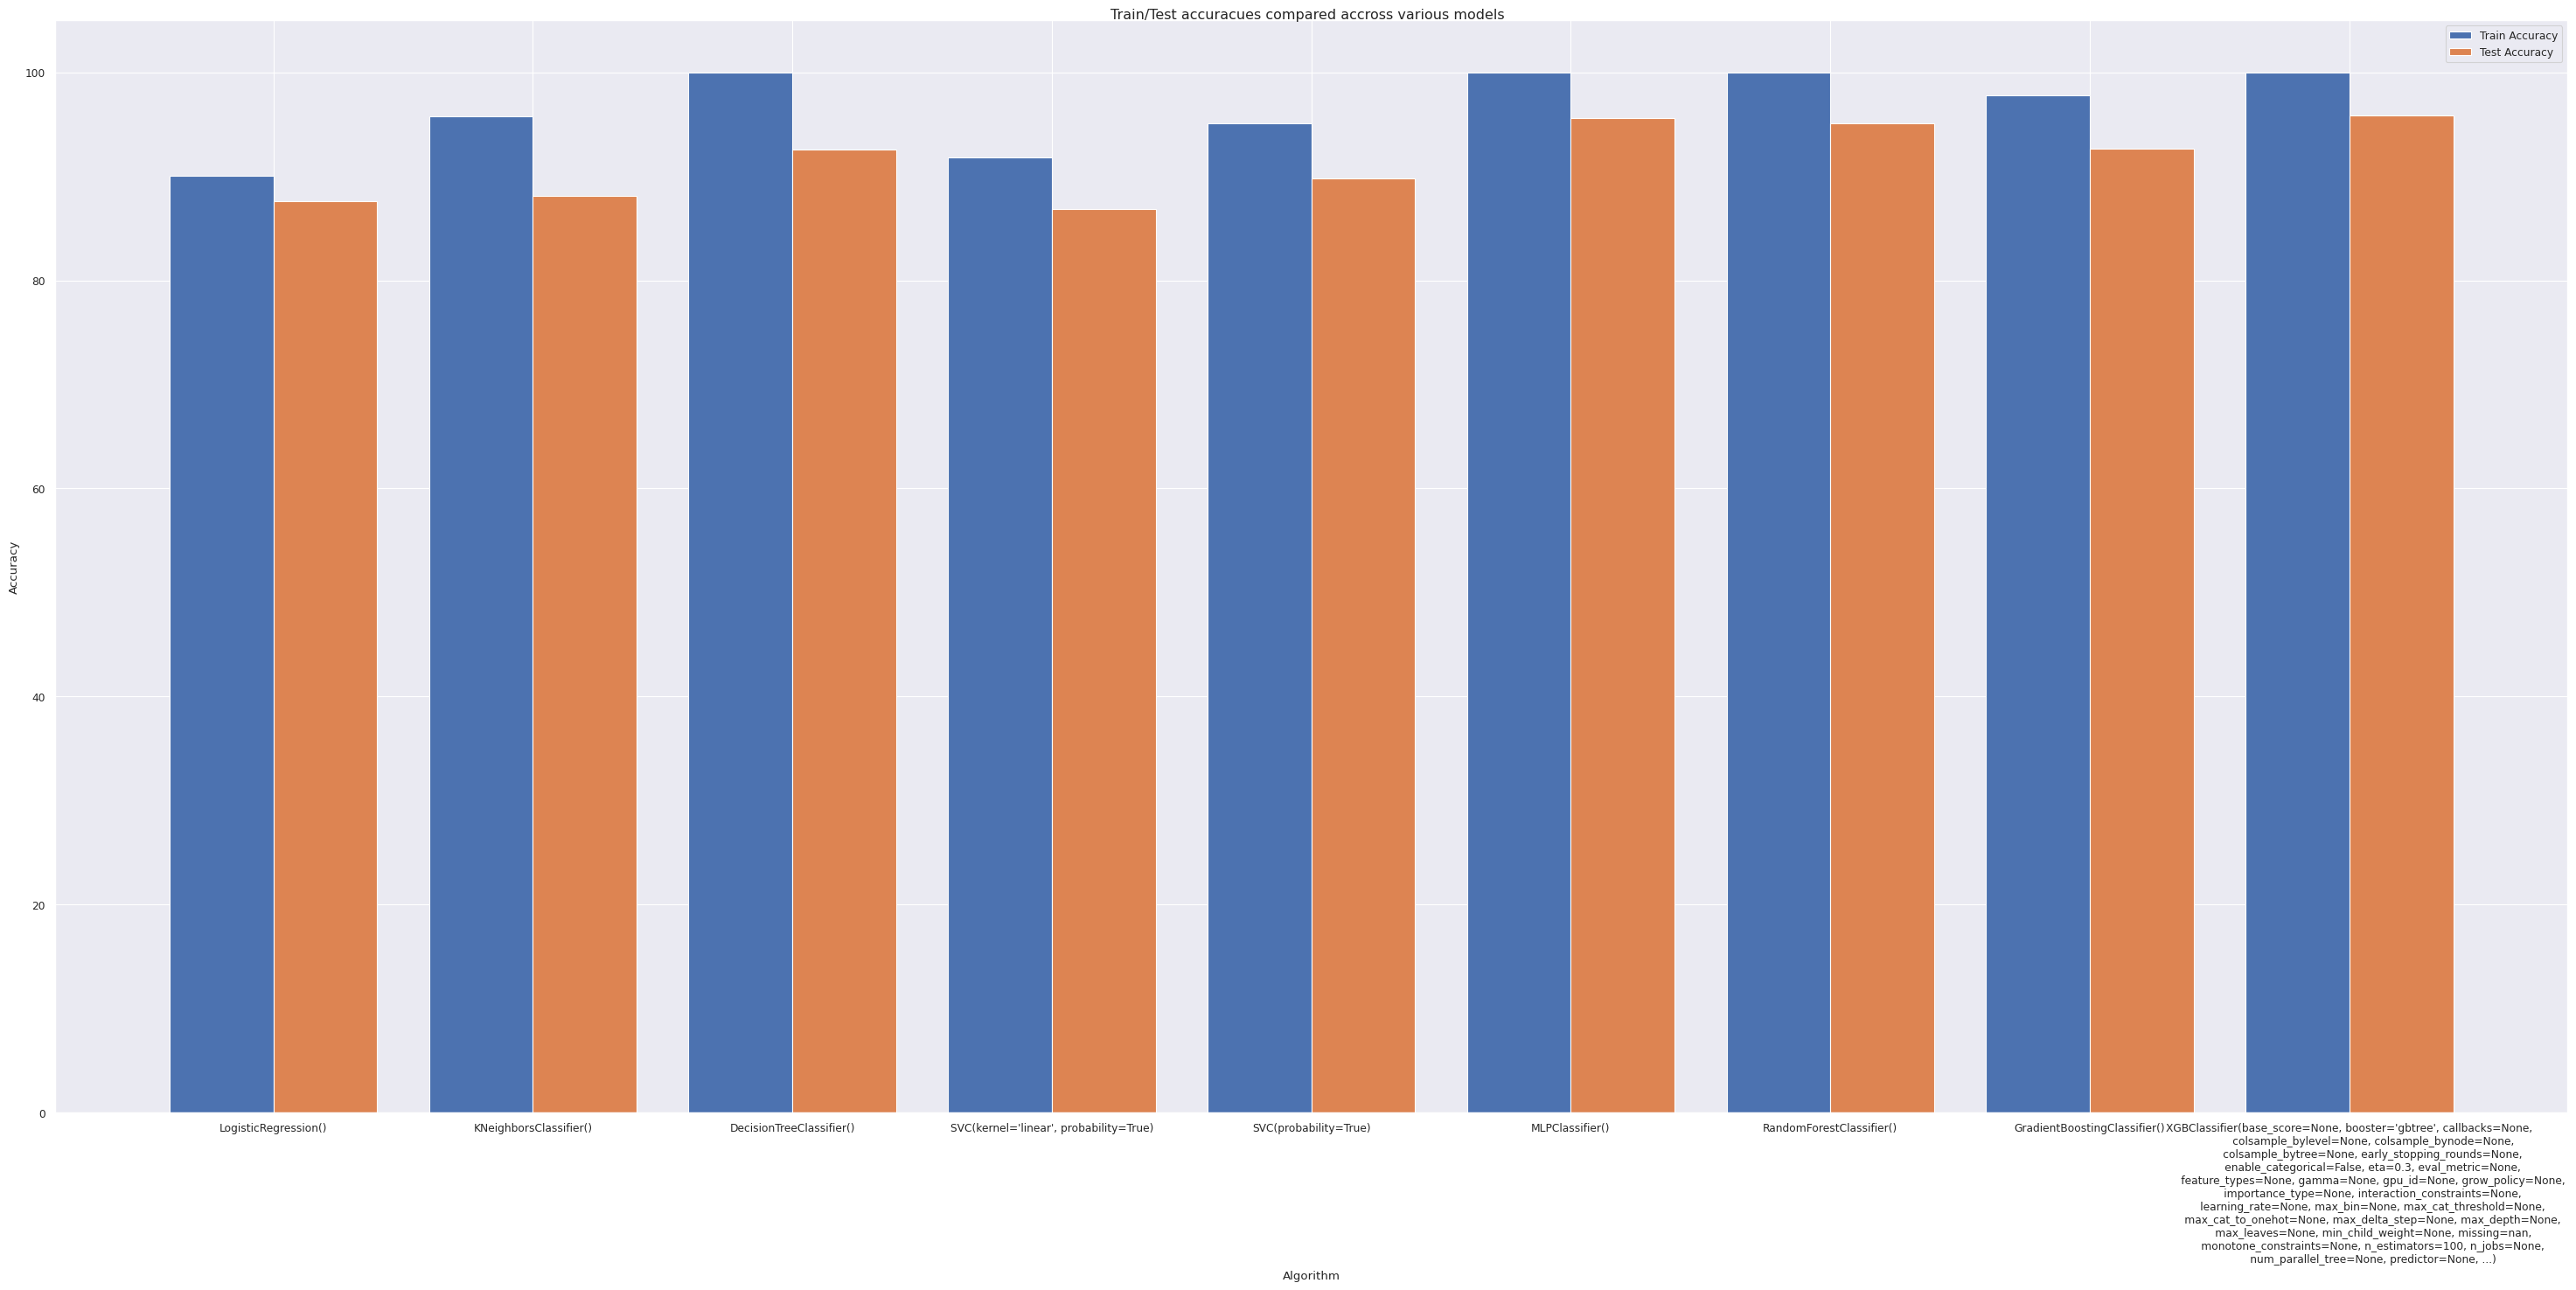

<Figure size 3000x1500 with 0 Axes>

In [ ]:
# model_names = ['Logistic Regression', 'Decision Tree', 'KNN', 'SVM (Linear Kernel)', 'SVM (RBF Kernel)', 'Neural Network', 'Random Forest', 'Adaboost', 'XGBoost']
# model_classes = [LogisticRegression(), DecisionTreeClassifier(),, KNeighborsClassifier(), SVC(kernel='linear',probability=True), SVC(kernel='rbf',probability=True), MLPClassifier(), RandomForestClassifier(), GradientBoostingClassifier(),XGBClassifier(use_label_encoder=False,booster='gbtree',eta=0.3)]

def get_accuracies(model_object):
    model = model_object
#     print(model)
    model.fit(X_train, y_train)
    train_acc = model.score(X_train, y_train)*100
    test_acc = model.score(X_test, y_test)*100
    return train_acc, test_acc

train_accuracies, test_accuracies = [], []
for model_name,each_model in original_models.items():
    train_acc, test_acc = get_accuracies(each_model)
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
#     print(train_acc, test_acc)

train_accuracies, test_accuracies
  
X_axis = np.arange(len(original_models.keys()))

plt.rcParams["figure.figsize"] = [30, 15]
plt.rcParams["figure.autolayout"] = True

plt.bar(X_axis - 0.2, train_accuracies, 0.4, label = 'Train Accuracy')
plt.bar(X_axis + 0.2, test_accuracies, 0.4, label = 'Test Accuracy')

plt.xticks(X_axis, original_models.values())
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.suptitle("Train/Test accuracues compared accross various models")
plt.legend()
plt.show()
# plt.savefig('accuracies.eps', format='eps')
plt.clf()

**10 FOLD CROSS VALIDATION**

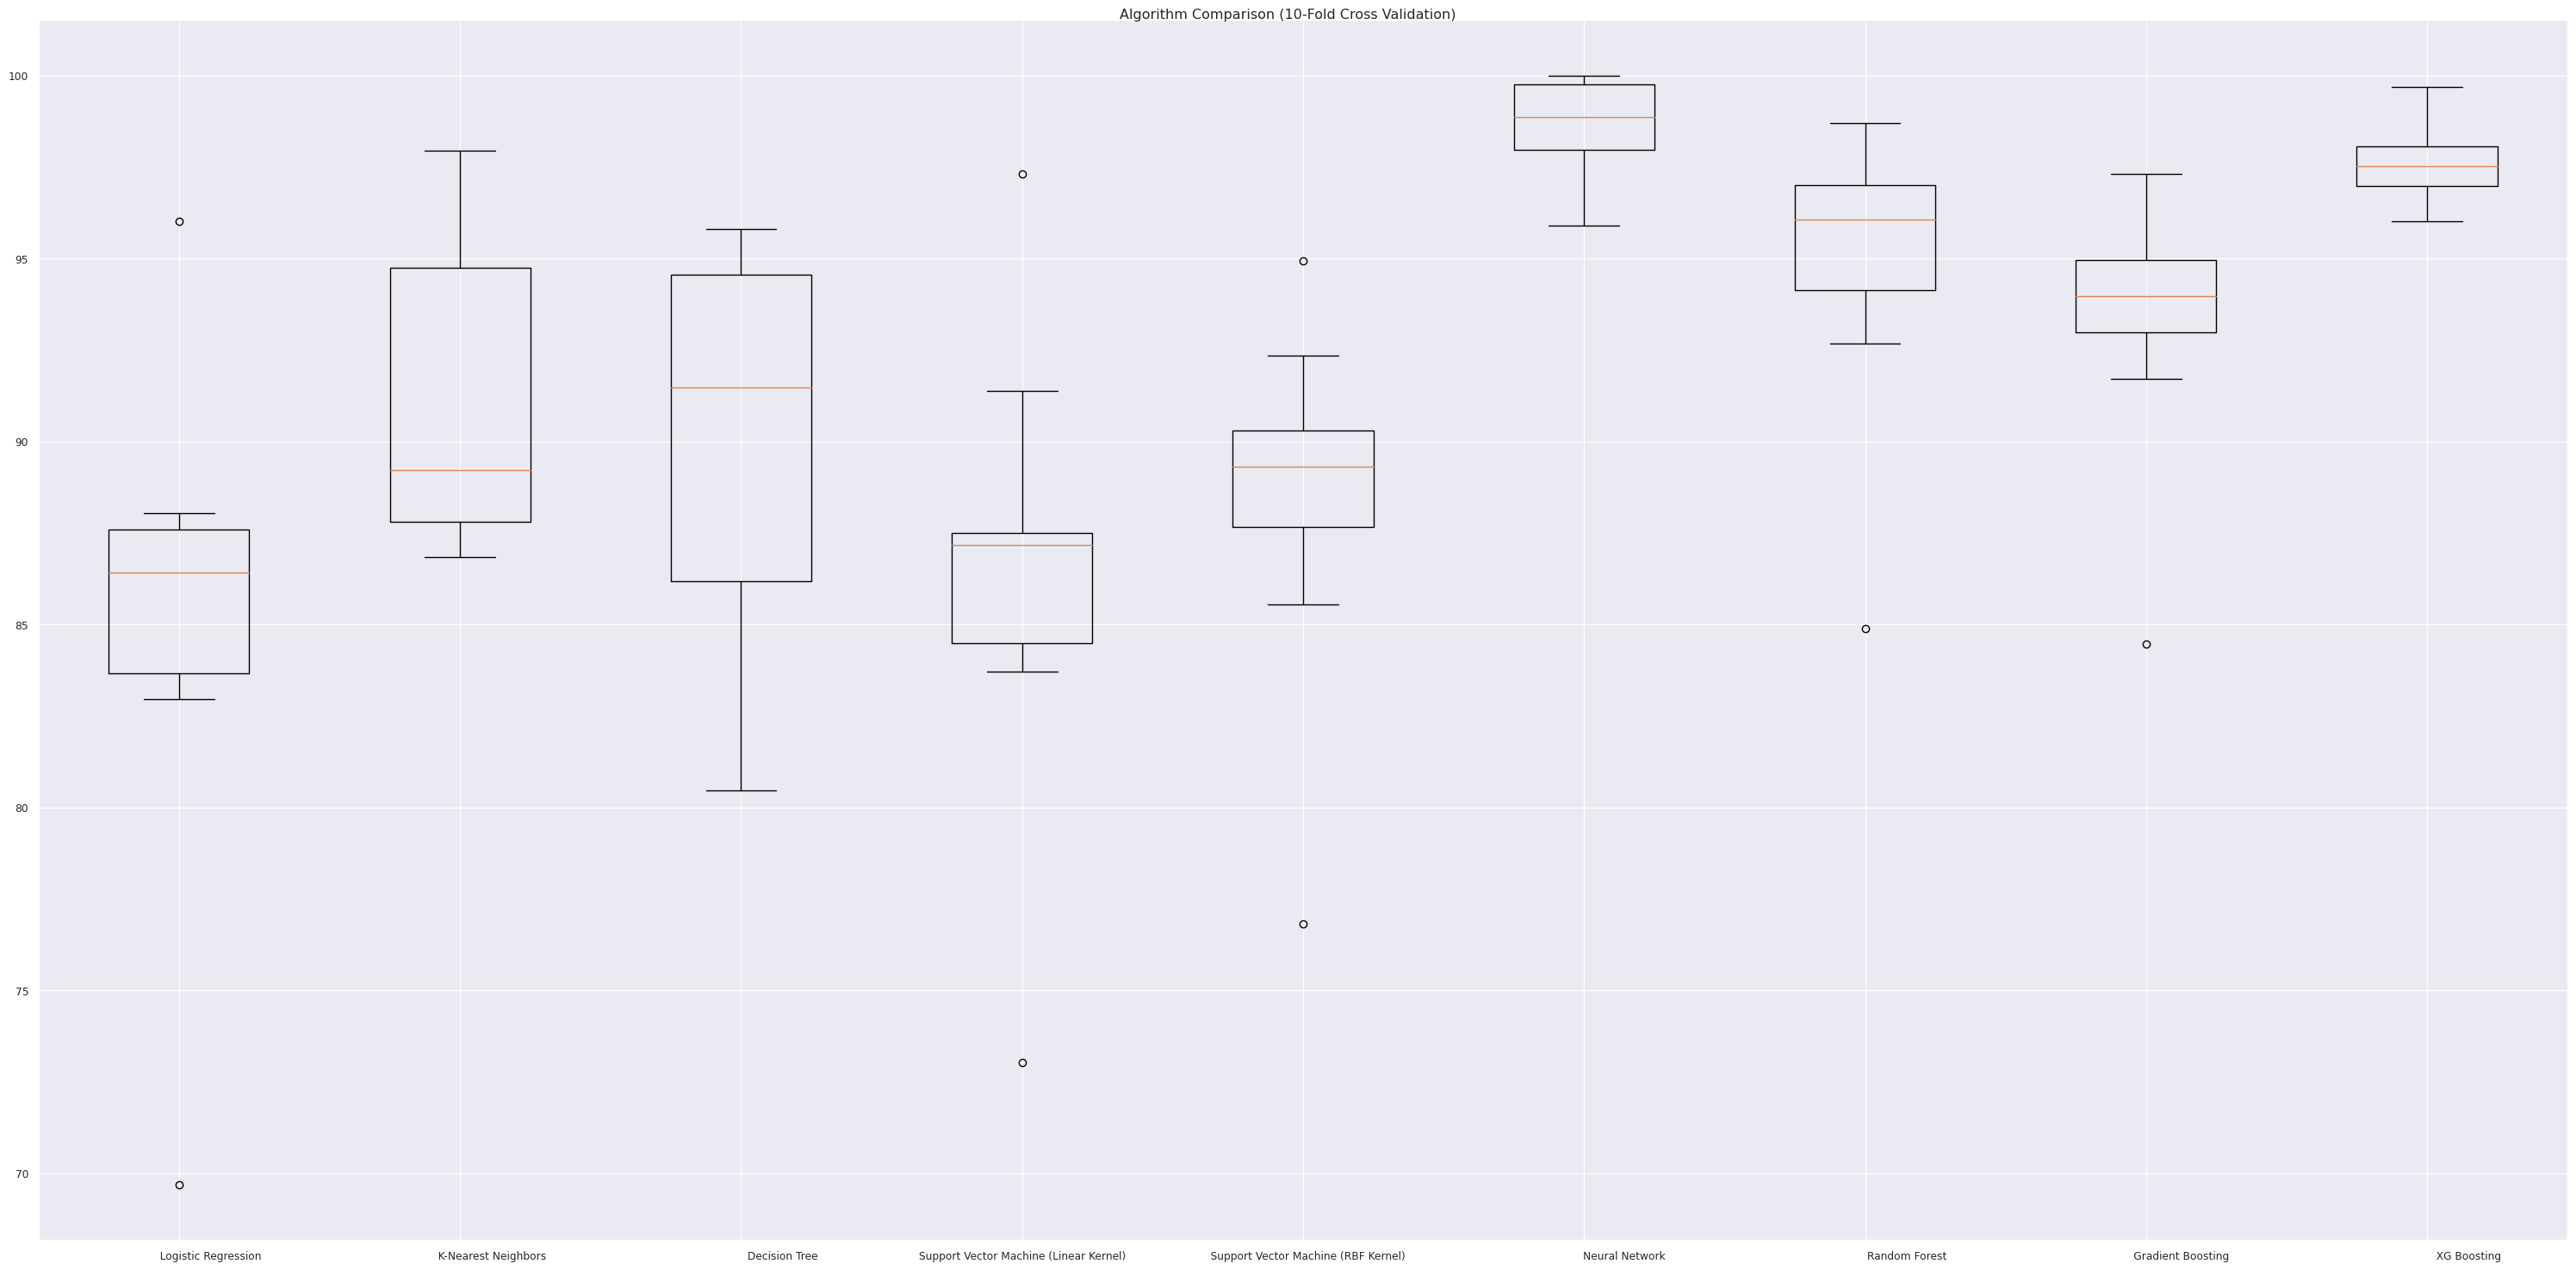

In [ ]:
models = []
# model_names = ['Logistic Regression', 'Decision Tree', 'Naive Bayes', 'KNN', 'SVM']
# model_classes = [LogisticRegression(), DecisionTreeClassifier(), BernoulliNB(), KNeighborsClassifier(), SVC()]
for name, model in original_models.items():
    models.append((name, model))
results, names = [], []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10)
	cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results*100)
	names.append(name)
fig = plt.figure()
fig.suptitle('Algorithm Comparison (10-Fold Cross Validation)')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()
# plt.savefig('cross_validation.eps', format='eps')

**CONFUSION, F-1, PRECISION, RECALL**

In [ ]:
plt.rcParams["figure.figsize"] = [5, 3]
plt.rcParams["figure.autolayout"] = True

# def plot_confusion_mat(name, model):
#     color = 'black'
#     matrix = plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues, display_labels=['Loss/Draw', 'Win'])
#     matrix.ax_.set_title(name + ' - Confusion Matrix', color=color)
#     plt.xlabel('Predicted Label', color=color)
#     plt.ylabel('True Label', color=color)
#     plt.gcf().axes[0].tick_params(colors=color)
#     plt.gcf().axes[1].tick_params(colors=color)
#     plt.show()
#     plt.savefig('cm_{}.eps'.format(name.replace(" ", "_").lower()), format='eps')

def print_cm(cm, labels, hide_zeroes=False, hide_diagonal=False, hide_threshold=None):
    """pretty print for confusion matrixes"""
    columnwidth = max([len(x) for x in labels] + [5])  # 5 is value length
    empty_cell = " " * columnwidth
    # Print header
    print("    " + empty_cell, end=" ")
    for label in labels:
        print("%{0}s".format(columnwidth) % label, end=" ")
    print()
    # Print rows
    for i, label1 in enumerate(labels):
        print("    %{0}s".format(columnwidth) % label1, end=" ")
        for j in range(len(labels)):
            cell = "%{0}.0f".format(columnwidth) % cm[i, j]
            if hide_zeroes:
                cell = cell if float(cm[i, j]) != 0 else empty_cell
            if hide_diagonal:
                cell = cell if i != j else empty_cell
            if hide_threshold:
                cell = cell if cm[i, j] > hide_threshold else empty_cell
            print(cell, end=" ")
        print()
        
def plot_roc(name, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('\n================================ ' + name + ' ================================')

    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix: \n")
    print_cm(cm, ['Loss/Draw', 'Win'])
    print("\nMetrics: \n")
    print(classification_report(y_test, y_pred, target_names = ['Loss/Draw', 'Win']))

for name, model in original_models.items():
  plot_roc(name, model)



================================                    Logistic Regression ================================
Confusion Matrix: 

              Loss/Draw       Win 
    Loss/Draw      1740       235 
          Win        19        52 

Metrics: 

              precision    recall  f1-score   support

   Loss/Draw       0.99      0.88      0.93      1975
         Win       0.18      0.73      0.29        71

    accuracy                           0.88      2046
   macro avg       0.59      0.81      0.61      2046
weighted avg       0.96      0.88      0.91      2046


================================                    K-Nearest Neighbors ================================
Confusion Matrix: 

              Loss/Draw       Win 
    Loss/Draw      1753       222 
          Win        21        50 

Metrics: 

              precision    recall  f1-score   support

   Loss/Draw       0.99      0.89      0.94      1975
         Win       0.18      0.70      0.29        71

    accuracy           

In [ ]:
# n_components = 10

# pca = PCA(n_components=n_components)
# pca.fit(X_train)

# X_train_reduced = pd.DataFrame(pca.transform(X_train), index=X_train.index, columns=["PC" + str(i) for i in range(1, n_components + 1)])
# X_test_reduced = pd.DataFrame(pca.transform(X_test), index=X_test.index, columns=["PC" + str(i) for i in range(1, n_components + 1)])

In [ ]:
# X_train_reduced

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,10.640914,-17.953347,13.676298,14.256703,-5.173048,4.217716,2.713042,-0.370090,-0.119858,-5.222869
1,-2.547058,2.210667,0.275120,-0.826461,-0.043200,1.116609,0.187078,0.190548,0.011875,-0.012958
2,-4.388349,4.208521,-0.113847,1.437674,0.873890,1.928672,-0.166194,0.220306,1.098365,0.966857
3,-0.304025,-0.322602,0.474487,-2.318930,-0.506324,0.331334,0.348945,0.604309,-0.078017,-0.496881
4,-1.449320,1.031157,-0.554317,0.592441,0.182891,-1.399556,0.347971,-0.165440,-1.028036,-0.796264
...,...,...,...,...,...,...,...,...,...,...
9267,2.901646,-2.714218,-0.338011,-1.013219,-0.700683,-0.734171,-0.304074,0.402211,-0.714722,-0.745874
9268,3.556212,-3.749935,-0.258852,-1.311158,-0.911775,0.228139,-0.513082,1.135942,-0.243534,0.606532
9269,2.614988,-4.022741,-1.094073,1.645025,-1.312681,0.054744,-0.800351,0.537062,-0.027273,-0.124361
9270,3.452857,-3.758062,-0.323361,-1.239033,-0.931019,0.288406,-0.528098,1.151711,-0.309141,0.638693


In [ ]:
# fig = px.bar(
#     x=["PC" + str(i) for i in range(1, n_components + 1)],
#     y=pca.explained_variance_ratio_,
#     labels={'x': "Principal Component", 'y': "Variance Ratio"},
#     color=pca.explained_variance_ratio_,
#     color_continuous_scale=[(0, 'lightblue'), (1, 'darkblue')],
#     title="Proportion of Variance in Principal Components"
# )

# fig.show()

In [ ]:
# reduced_models = {
#     "                   Logistic Regression": LogisticRegression(),
#     "                   K-Nearest Neighbors": KNeighborsClassifier(),
#     "                         Decision Tree": DecisionTreeClassifier(),
#     "Support Vector Machine (Linear Kernel)": LinearSVC(),
#     "   Support Vector Machine (RBF Kernel)": SVC(),
#     "                        Neural Network": MLPClassifier(),
#     "                         Random Forest": RandomForestClassifier(),
#     "                     Gradient Boosting": GradientBoostingClassifier(),
#     "                          XG Boosting ": XGBClassifier(use_label_encoder=False,booster='gbtree',eta=0.3)
# }

# for name, model in reduced_models.items():
#     model.fit(X_train_reduced, y_train)
#     print(name + " trained.")

                   Logistic Regression trained.
                   K-Nearest Neighbors trained.
                         Decision Tree trained.
Support Vector Machine (Linear Kernel) trained.
   Support Vector Machine (RBF Kernel) trained.
                        Neural Network trained.
                         Random Forest trained.
                     Gradient Boosting trained.
                          XG Boosting  trained.


In [ ]:
# reduced_results = []

# for name, model in reduced_models.items():
#     result = model.score(X_test_reduced, y_test)
#     reduced_results.append(result)
#     print(name + ": {:.2f}%".format(result * 100))

                   Logistic Regression: 84.56%
                   K-Nearest Neighbors: 88.03%
                         Decision Tree: 89.54%
Support Vector Machine (Linear Kernel): 84.75%
   Support Vector Machine (RBF Kernel): 84.75%
                        Neural Network: 91.20%
                         Random Forest: 93.40%
                     Gradient Boosting: 88.03%
                          XG Boosting : 92.86%


In [ ]:
# fig = px.bar(
#     x=np.subtract(reduced_results, original_results),
#     y=original_models.keys(),
#     orientation='h',
#     labels={'x': "Change in Performance", 'y': "Model"},
#     color=np.subtract(reduced_results, original_results),
#     color_continuous_scale=[(0, 'red'), (1, 'blue')],
#     title="Change in Model Performance After Dimensionality Reduction"
# )

# fig.show()

**ROC AUC CURVES**

LogisticRegression()
KNeighborsClassifier()
DecisionTreeClassifier()
SVC(kernel='linear', probability=True)
SVC(probability=True)
MLPClassifier()
RandomForestClassifier()
GradientBoostingClassifier()
XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.3, eval_metric=None,
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, ...)


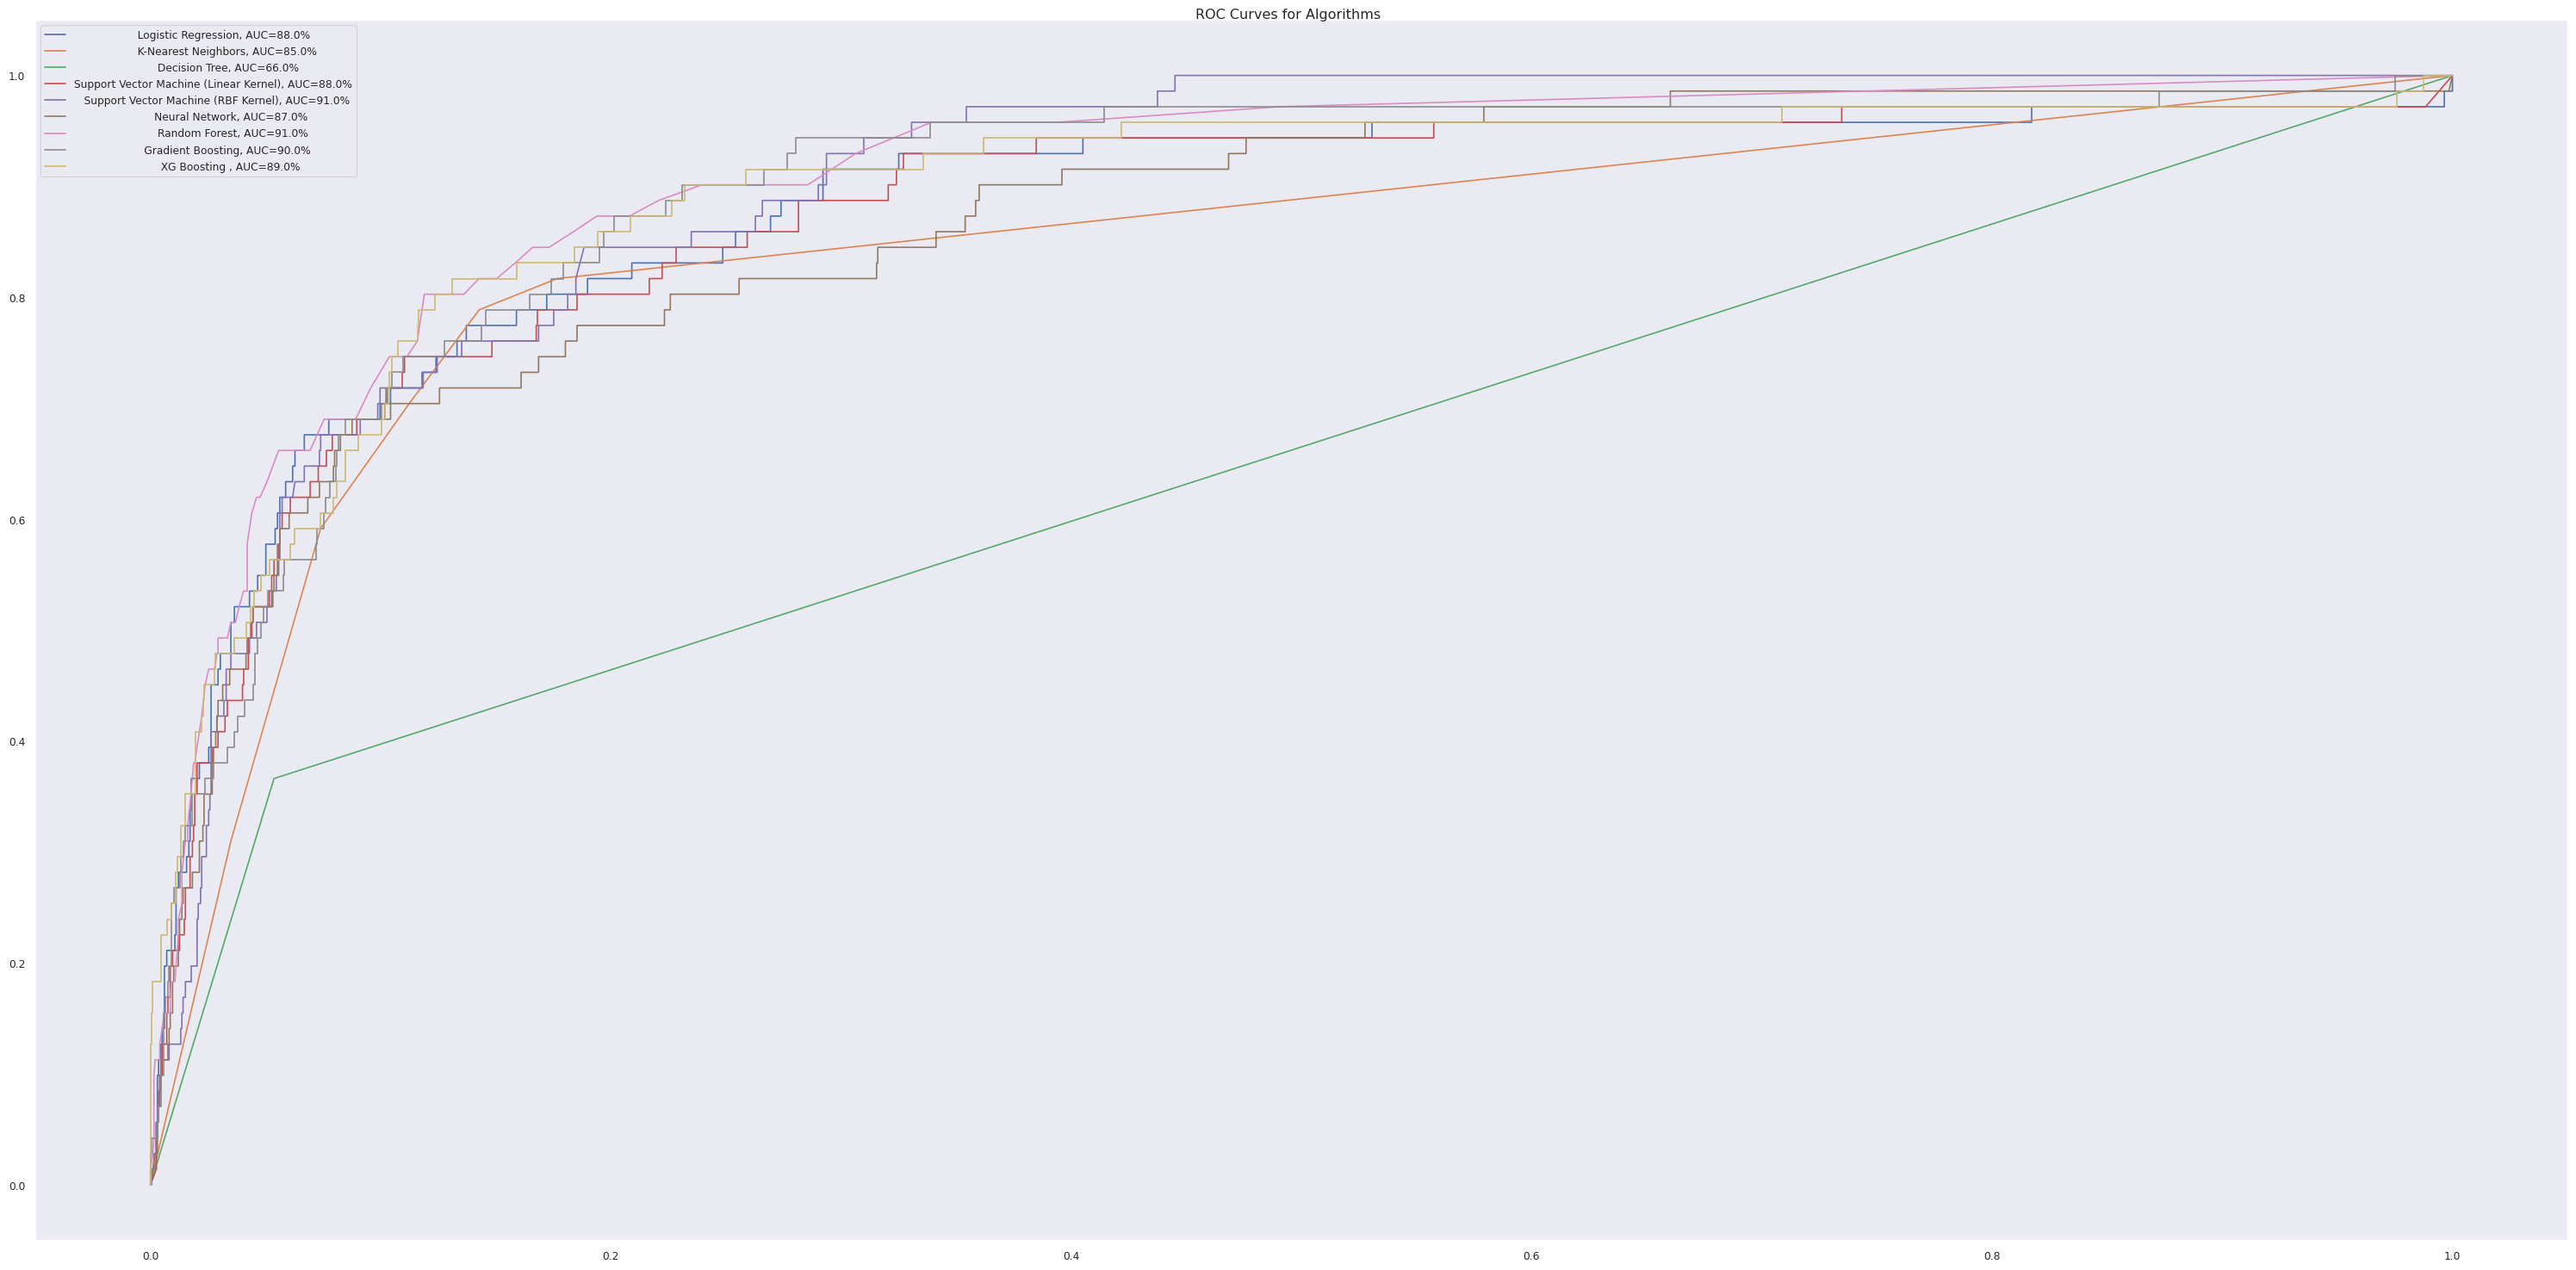

<Figure size 3000x1500 with 0 Axes>

In [ ]:
# AUC/ROC Curves
def plot_roc(name, model):
    model.fit(X_train, y_train)
    print(model)
    y_pred = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
    auc = round(metrics.roc_auc_score(y_test, y_pred), 2)
    plt.plot(fpr,tpr,label="{}, AUC={}%".format(name, str(round(auc*100, 2))))

for name, model in original_models.items():
  plot_roc(name,model)

plt.suptitle('ROC Curves for Algorithms')
plt.legend()
plt.grid()
plt.show()
# plt.savefig('roc.eps', format='eps')
plt.clf()